# Violence Against Women and Girls (VAWG) DataViz

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## About the Dataset

The Demographic and Health Surveys (DHS) Program exists to advance the global understanding of health and population trends in developing countries. “The DHS Program STATcompiler allows users to make custom tables based on thousands of demographic and health indicators across more than 90 countries.” 

The DHS Program aims to improve the collection, analysis, and dissemination of population, health, and nutrition data to enhance national and international policy-making. This week’s #MakeoverMonday data was taken from a survey of men and women in African, Asian, and South American countries, exploring the attitudes and perceived justifications given for committing acts of violence against women. The data also explores different sociodemographic groups that the respondents belong to, including: Education Level, Marital status, Employment, and Age group. Based on a representative sample of each country, the data reveals dramatic insights into some of the attitudes and assumptions that prevent progress in the global campaign to end violence against women and girls.

As you will see from the data, access to education appears to be the biggest game-changer when it comes to awareness that violence against women and girls can never be justified. It is, therefore, critical that the countries where these views are widespread, prioritize public awareness campaigns, and access to education for women and girls, to communicate that violence against women and girls is never acceptable or justifiable. 

Please see the link to know more about the dataset: [statcompiler](https://www.statcompiler.com/en/) & [kaggle](https://www.kaggle.com/andrewmvd/violence-against-women-and-girls).

**Attribute Information**

- 1) 'RecordID': Numeric value unique to each question by country
- 2) 'Country': Country in which the survey was conducted
- 3) 'Gender': Whether the respondents were Male or Female
- 4) 'Demographics Question': Refers to the different types of demographic groupings used to segment respondents – marital status, education level, employment status, residence type, or age
- 5) 'Demographics Response': Refers to demographic segment into which the respondent falls (e.g. the age groupings are split into 15-24, 25-34, and 35-49)
- 6) 'Question': Respondents were asked if they agreed with the following statements: 
        * A husband is justified in hitting or beating his wife if she burns the food 
        * A husband is justified in hitting or beating his wife if she argues with him 
        * A husband is justified in hitting or beating his wife if she goes out without telling him 
        * A husband is justified in hitting or beating his wife if she neglects the children 
        * A husband is justified in hitting or beating his wife if she refuses to have sex with him 
        * A husband is justified in hitting or beating his wife for at least one specific reason;
- 7) 'Survey Year': Year in which the Demographic and Health Survey (DHS) took place. “DHS surveys are nationally-representative household surveys that provide data for a wide range of monitoring and impact evaluation indicators in the areas of population, health, and nutrition. Standard DHS Surveys have large sample sizes (usually between 5,000 and 30,000 households) and typically are conducted around every 5 years, to allow comparisons over time. 
- 8) 'Value': % of people surveyed in the relevant group who agree with the question (e.g. the percentage of women aged 15-24 in Afghanistan who agree that a husband is justified in hitting or beating his wife if she burns the food)


Footnotes from the [data source](https://www.statcompiler.com/en/):
- Pakistan

Year - 2017-18: National figures and background characteristics of the 2017-18 PDHS
excludes Azad Jammu and Kashmir and Gilgit Baltistan regions. As the 2012-13 PDHS
included Gilgit Baltistan, trend analysis should be done with caution.


### Load Dataset

In [2]:
df = pd.read_csv('violence_data.csv')
df.drop('RecordID', axis = 1, inplace = True)
df['Survey Year'] = pd.DatetimeIndex(df['Survey Year']).year 
print (df.shape)
df.head()

(12600, 7)


,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,Afghanistan,F,Marital status,Never married,... if she burns the food,2015,NaN
1,Afghanistan,F,Education,Higher,... if she burns the food,2015,10.1
2,Afghanistan,F,Education,Secondary,... if she burns the food,2015,13.7
3,Afghanistan,F,Education,Primary,... if she burns the food,2015,13.8
4,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,2015,13.8


#### What about Missing Values?

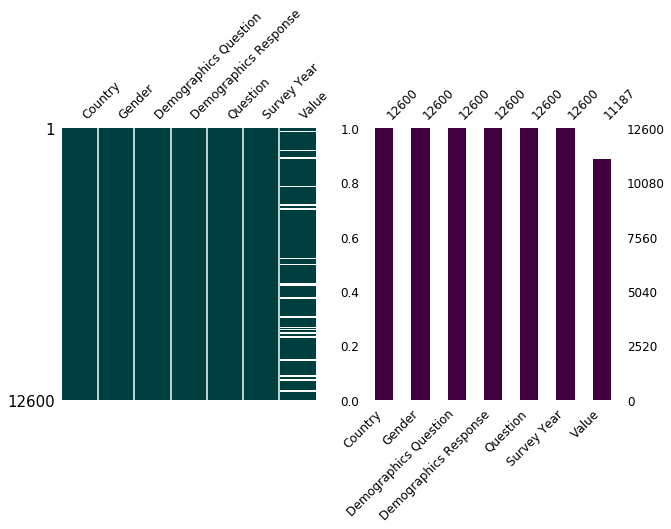

In [3]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
msno.matrix(df, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(df, ax=ax2, fontsize = 12, color=(0.25, 0., 0.25))
plt.show()

### How many entries are there in the dataset from different genders?

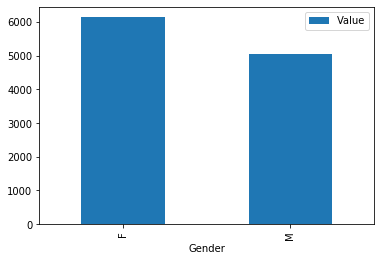

In [4]:
df.groupby(['Gender']).agg({'Value': 'count'}).plot(kind = 'bar')

### How many entries are there in the dataset from each survey year?

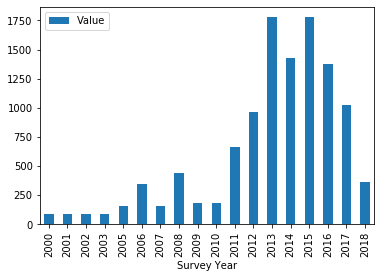

In [5]:
df.groupby(['Survey Year']).agg({'Value': 'count'}).plot(kind = 'bar')

### 2010: Country that caused more VAWG and detailed demographic responses

In [6]:
survey_2010 = df[(df['Survey Year'] == 2010)].groupby(['Country']).aggregate({'Value':np.sum})
survey_2010['Value'].nlargest(1)

Country
Burkina Faso    3670.8
Name: Value, dtype: float64

In [7]:
BF = df[df.Country == 'Burkina Faso']
BF = BF.groupby(['Demographics Question', 'Demographics Response', 'Gender', 'Question']).agg({'Value': 'sum'}).reset_index()

marital_stat_BF = BF[BF['Demographics Question'] == 'Marital status']
education_BF = BF[BF['Demographics Question'] == 'Education']
employment_BF = BF[BF['Demographics Question'] == 'Employment']
age_BF = BF[BF['Demographics Question'] == 'Age']
res_BF = BF[BF['Demographics Question'] == 'Residence']

In [8]:
def swarmplot(country, df):

    plt.figure(figsize = [8, 5])
    g = sns.swarmplot(x="Value", y="Question",hue="Gender", sizes=(10, 30), data=df, palette="Set2")
    plt.title('{} Survey Answers among Men and Women: All Demographics'.format(country))
    plt.legend(frameon = False, bbox_to_anchor=(1, 1))
    plt.show()
    
def catplot(data, titles):
    
    g = sns.catplot(x='Value', y='Demographics Response', col='Gender', hue='Question',
                data=data, kind='bar', ci=None, palette="Set2", margin_titles=True)
    g.fig.suptitle(titles, y=1.05)
    (g.set_axis_labels("", "Percentage (%) Agreed").set_titles("{col_name} {col_var}").set(xlim=(0, 90)).despine(left=True))
    plt.show()
    
def overview_plt(country, df):
    
    plt.figure(figsize = [8, 12])
    g = sns.barplot(x="Value", y = 'Demographics Response', data=df, hue = 'Question',  palette="Set2", ci = None)
    plt.title('Overview of Survey Answers Irrespective of Gender in {}'.format(country))
    plt.xlabel('Percentage Agreed to the Response')
    plt.ylabel('Demographic Groups')
    plt.legend(frameon = False, bbox_to_anchor=(1, 1))
    plt.show()

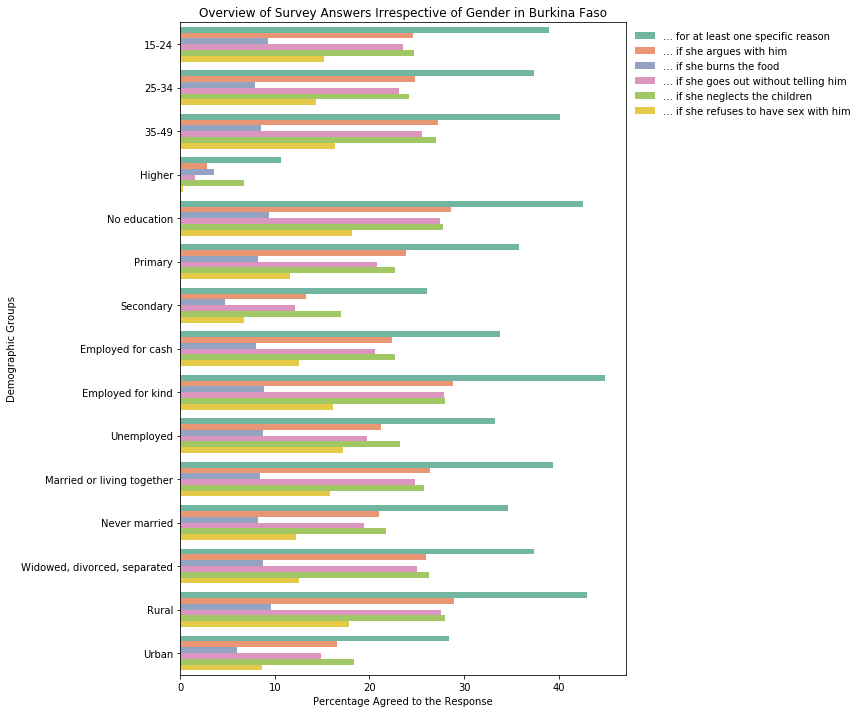

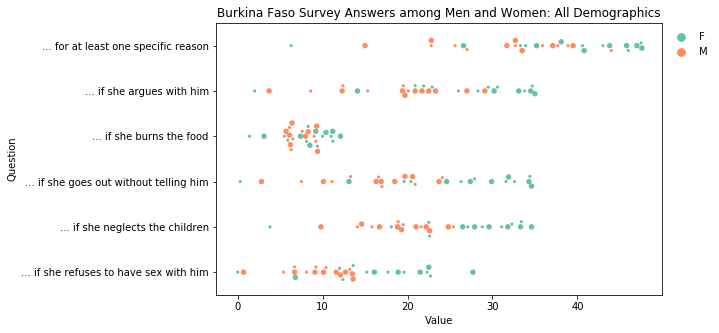

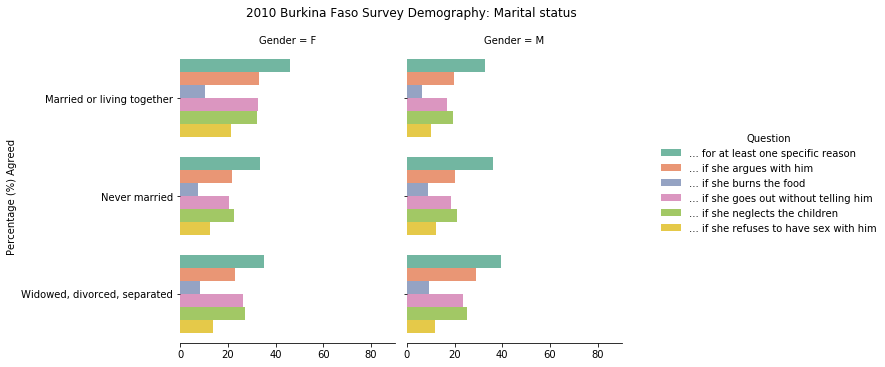

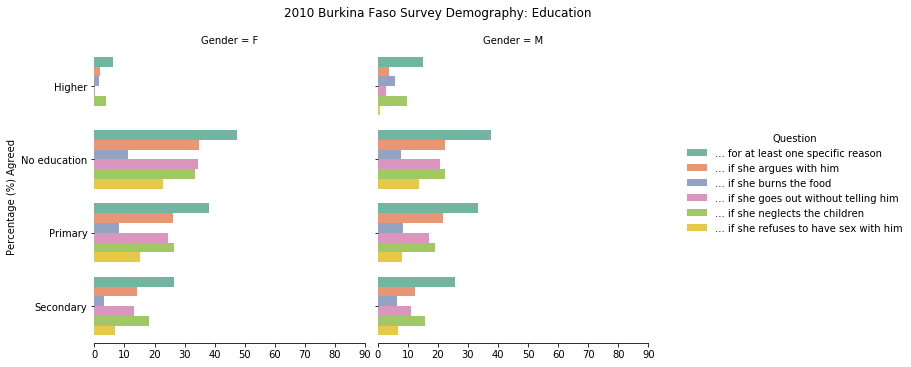

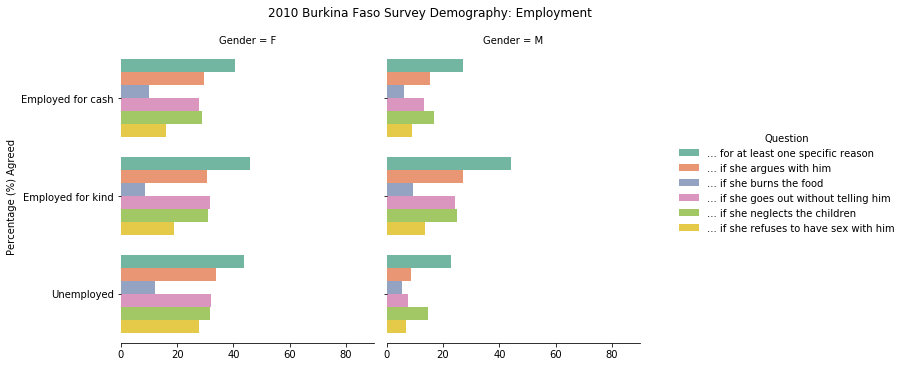

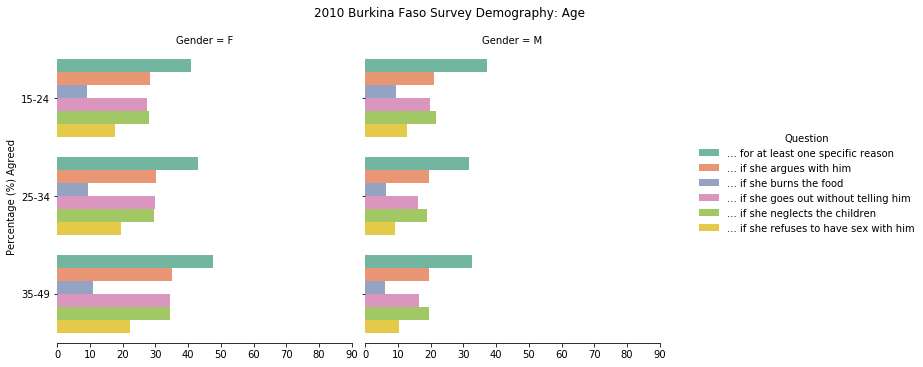

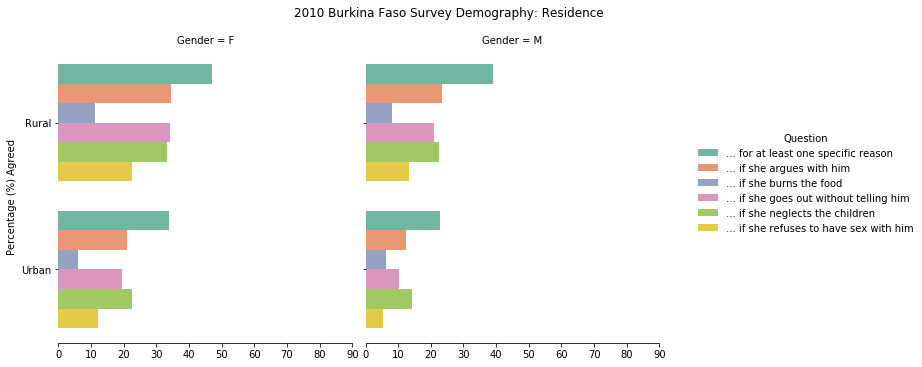

In [9]:
overview_plt('Burkina Faso', BF)

swarmplot("Burkina Faso", BF)

catplot(marital_stat_BF, '2010 Burkina Faso Survey Demography: Marital status')
catplot(education_BF, '2010 Burkina Faso Survey Demography: Education')
catplot(employment_BF, '2010 Burkina Faso Survey Demography: Employment')
catplot(age_BF, '2010 Burkina Faso Survey Demography: Age')
catplot(res_BF, '2010 Burkina Faso Survey Demography: Residence')

### 2011: Country that caused more VAWG and detailed demographic responses

In [10]:
survey_2011 = df[(df['Survey Year'] == 2011)].groupby(['Country']).aggregate({'Value':np.sum})
survey_2011['Value'].nlargest(1)

Country
Cote d'Ivoire    4558.0
Name: Value, dtype: float64

In [11]:
CI = df[df.Country == "Cote d'Ivoire"]
CI = CI.groupby(['Demographics Question', 'Demographics Response', 'Gender', 'Question']).agg({'Value': 'sum'}).reset_index()

marital_stat_CI = CI[CI['Demographics Question'] == 'Marital status']
education_CI = CI[CI['Demographics Question'] == 'Education']
employment_CI = CI[CI['Demographics Question'] == 'Employment']
age_CI = CI[CI['Demographics Question'] == 'Age']
res_CI = CI[CI['Demographics Question'] == 'Residence']

In [12]:
def swarmplot(country, df):

    plt.figure(figsize = [8, 5])
    g = sns.swarmplot(x="Value", y="Question",hue="Gender", sizes=(10, 30), data=df, palette = 'Set3')
    plt.title('{} Survey Answers among Men and Women: All Demographics'.format(country))
    plt.legend(frameon = False, bbox_to_anchor=(1, 1))
    plt.show()
    
def catplot(data, titles):
    
    sns.set_palette("Set3")
    g = sns.catplot(x='Value', y='Demographics Response', col='Gender', hue='Question',
                data=data, kind='bar', ci=None, margin_titles=True)
    g.fig.suptitle(titles, y=1.05)
    (g.set_axis_labels("", "Percentage (%) Agreed").set_titles("{col_name} {col_var}").set(xlim=(0, 90)).despine(left=True))
    plt.show()
    
def overview_plt(country, df):
    
    plt.figure(figsize = [8, 12])
    g = sns.barplot(x="Value", y = 'Demographics Response', data=df, hue = 'Question',  palette="Set3", ci = None)
    plt.title('Overview of Survey Answers Irrespective of Gender in {}'.format(country))
    plt.xlabel('Percentage Agreed to the Response')
    plt.ylabel('Demographic Groups')
    plt.legend(frameon = False, bbox_to_anchor=(1, 1))
    plt.show()

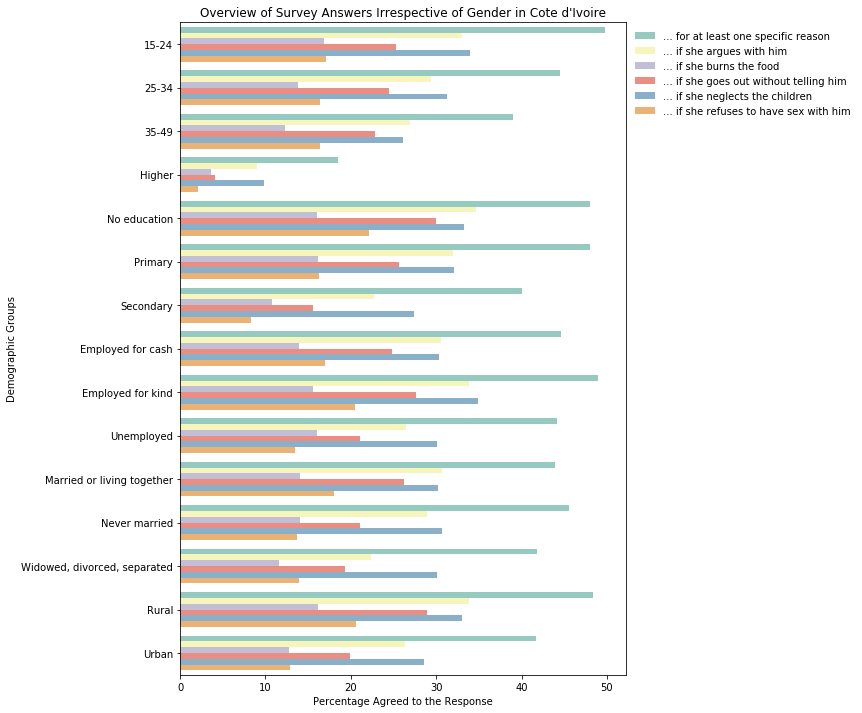

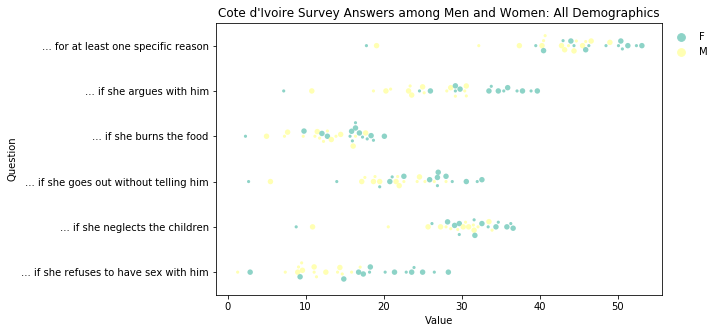

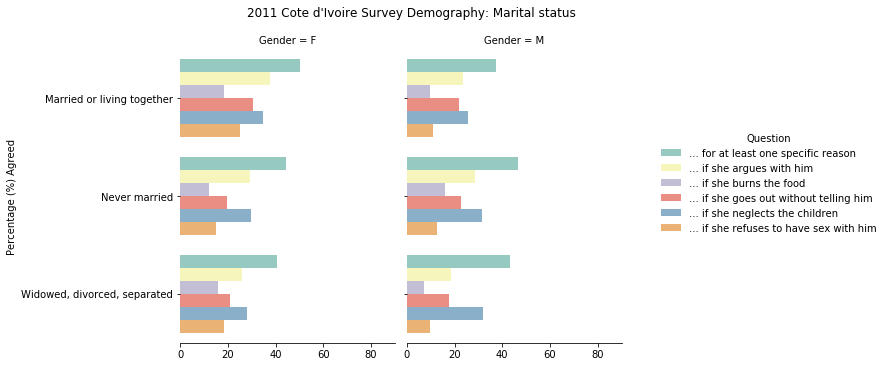

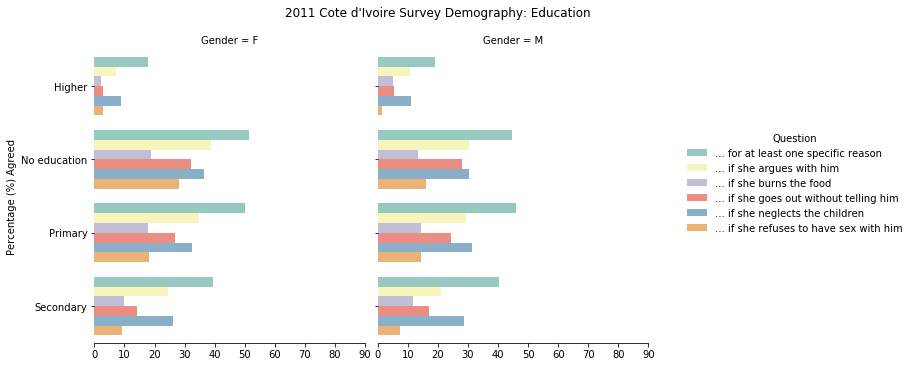

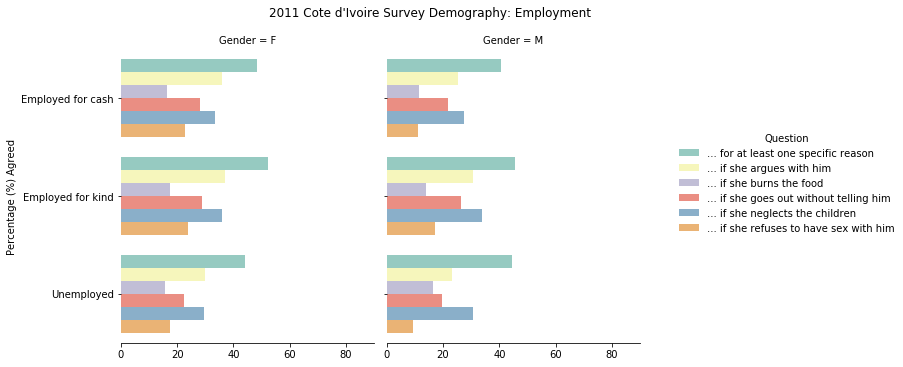

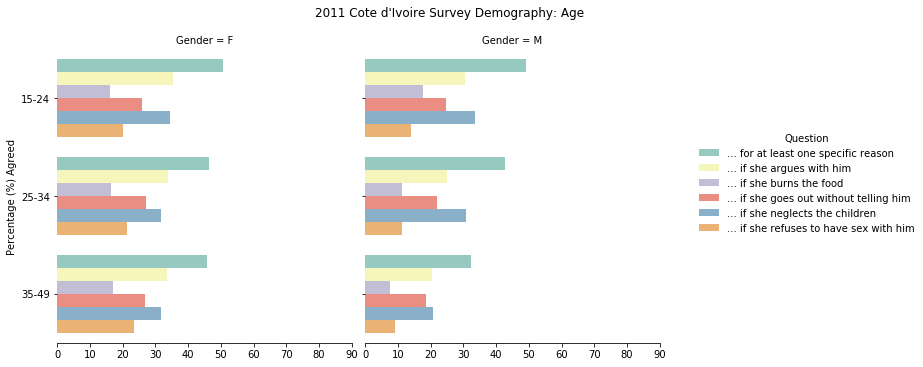

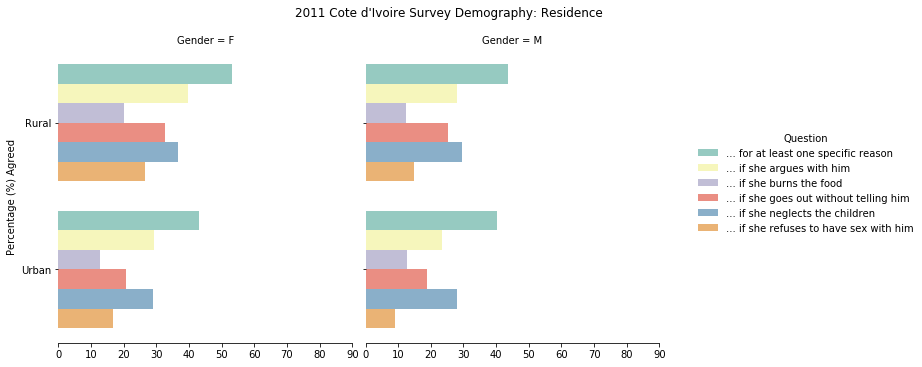

In [13]:
overview_plt("Cote d'Ivoire", CI)

swarmplot("Cote d'Ivoire", CI)

catplot(marital_stat_CI, "2011 Cote d'Ivoire Survey Demography: Marital status")
catplot(education_CI, "2011 Cote d'Ivoire Survey Demography: Education")
catplot(employment_CI, "2011 Cote d'Ivoire Survey Demography: Employment")
catplot(age_CI, "2011 Cote d'Ivoire Survey Demography: Age")
catplot(res_CI, "2011 Cote d'Ivoire Survey Demography: Residence")

### 2012: Country that caused more VAWG and detailed demographic responses

In [14]:
survey_2012 = df[(df['Survey Year'] == 2012)].groupby(['Country']).aggregate({'Value':np.sum})
survey_2012['Value'].nlargest(1)

Country
Niger    5258.0
Name: Value, dtype: float64

In [15]:
N = df[df.Country == "Niger"]
N = N.groupby(['Demographics Question', 'Demographics Response', 'Gender', 'Question']).agg({'Value': 'sum'}).reset_index()

marital_stat_N = N[N['Demographics Question'] == 'Marital status']
education_N = N[N['Demographics Question'] == 'Education']
employment_N = N[N['Demographics Question'] == 'Employment']
age_N = N[N['Demographics Question'] == 'Age']
res_N = N[N['Demographics Question'] == 'Residence']

In [16]:
def swarmplot(country, df):

    plt.figure(figsize = [8, 5])
    g = sns.swarmplot(x="Value", y="Question",hue="Gender", sizes=(10, 30), data=df, palette = "RdBu")
    plt.title('{} Survey Answers among Men and Women: All Demographics'.format(country))
    plt.legend(frameon = False, bbox_to_anchor=(1, 1))
    plt.show()
    
def catplot(data, titles):
    
    sns.set_palette("RdBu")
    g = sns.catplot(x='Value', y='Demographics Response', col='Gender', hue='Question',
                data=data, kind='bar', ci=None, margin_titles=True)
    g.fig.suptitle(titles, y=1.05)
    (g.set_axis_labels("", "Percentage (%) Agreed").set_titles("{col_name} {col_var}").set(xlim=(0, 90)).despine(left=True))
    plt.show()   
    
def overview_plt(country, df):
    
    plt.figure(figsize = [8, 12])
    g = sns.barplot(x="Value", y = 'Demographics Response', data=df, hue = 'Question',  palette="RdBu", ci = None)
    plt.title('Overview of Survey Answers Irrespective of Gender in {}'.format(country))
    plt.xlabel('Percentage Agreed to the Response')
    plt.ylabel('Demographic Groups')
    plt.legend(frameon = False, bbox_to_anchor=(1, 1))
    plt.show()

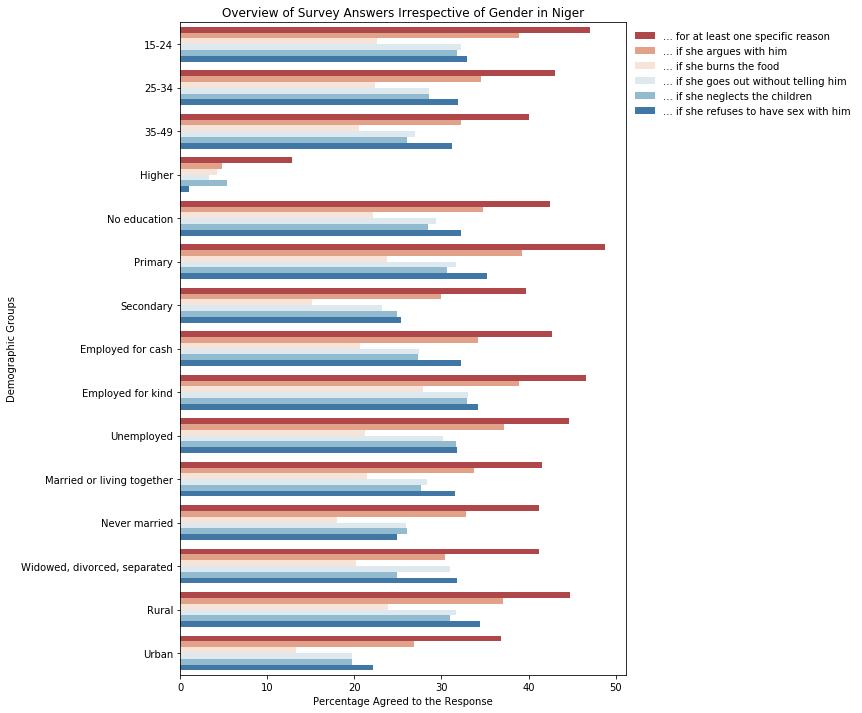

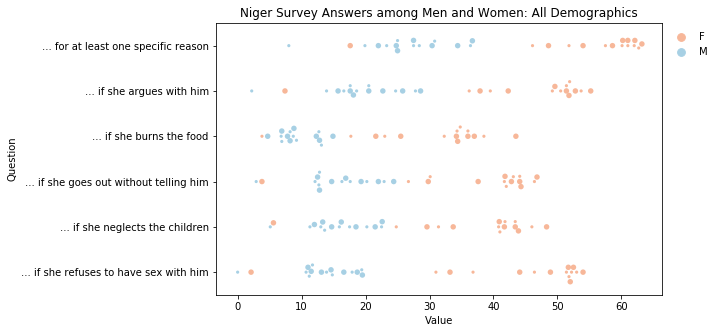

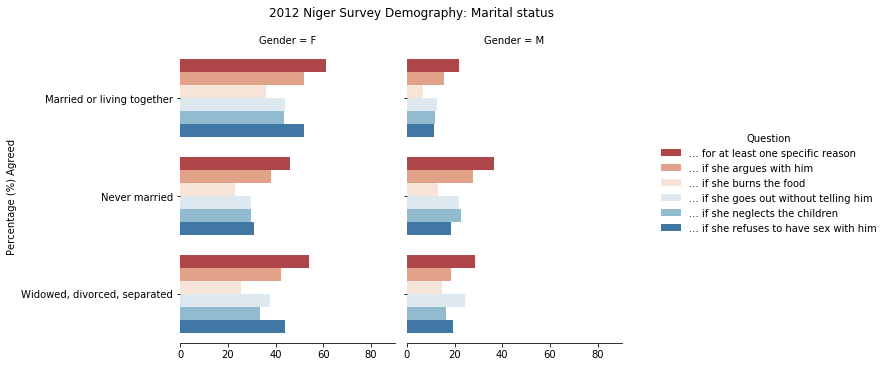

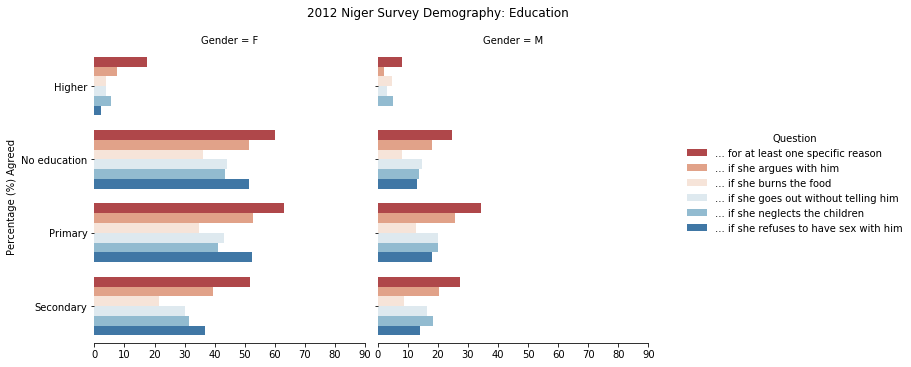

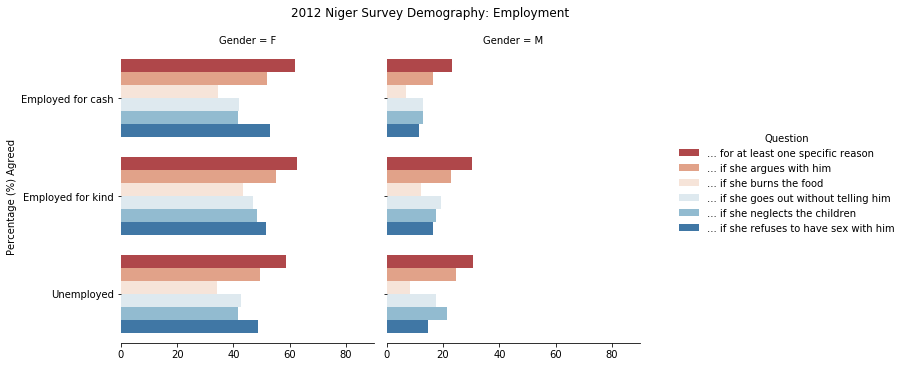

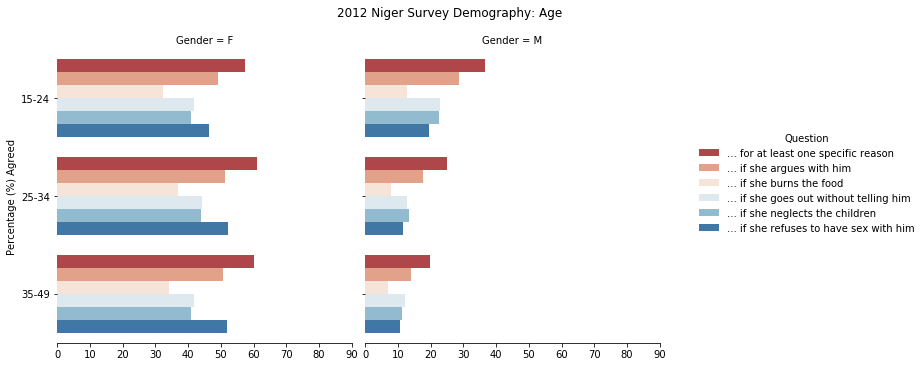

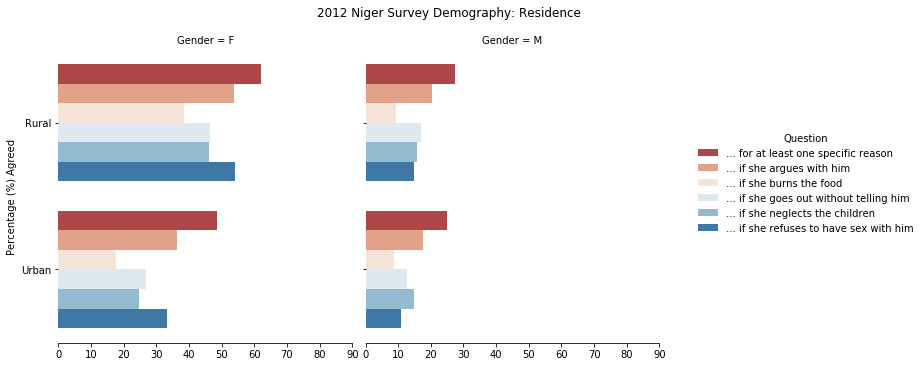

In [17]:
overview_plt("Niger", N)

swarmplot("Niger", N)

catplot(marital_stat_N, "2012 Niger Survey Demography: Marital status")
catplot(education_N, "2012 Niger Survey Demography: Education")
catplot(employment_N, "2012 Niger Survey Demography: Employment")
catplot(age_N, "2012 Niger Survey Demography: Age")
catplot(res_N, "2012 Niger Survey Demography: Residence")

### 2013: Country that caused more VAWG and detailed demographic responses

In [18]:
survey_2013 = df[(df['Survey Year'] == 2013)].groupby(['Country']).aggregate({'Value':np.sum})
survey_2013['Value'].nlargest(1)

Country
Congo Democratic Republic    7483.7
Name: Value, dtype: float64

In [19]:
CDR = df[df.Country == "Congo Democratic Republic"]
CDR = CDR.groupby(['Demographics Question', 'Demographics Response', 'Gender', 'Question']).agg({'Value': 'sum'}).reset_index()

marital_stat_CDR = CDR[CDR['Demographics Question'] == 'Marital status']
education_CDR = CDR[CDR['Demographics Question'] == 'Education']
employment_CDR = CDR[CDR['Demographics Question'] == 'Employment']
age_CDR = CDR[CDR['Demographics Question'] == 'Age']
res_CDR = CDR[CDR['Demographics Question'] == 'Residence']

In [20]:
def swarmplot(country, df):

    plt.figure(figsize = [8, 5])
    g = sns.swarmplot(x="Value", y="Question",hue="Gender", sizes=(10, 30), data=df, palette = "Oranges")
    plt.title('{} Survey Answers among Men and Women: All Demographics'.format(country))
    plt.legend(frameon = False, bbox_to_anchor=(1, 1))
    plt.show()
    
def catplot(data, titles):
    
    sns.set_palette("Oranges")
    g = sns.catplot(x='Value', y='Demographics Response', col='Gender', hue='Question',
                data=data, kind='bar', ci=None, margin_titles=True)
    g.fig.suptitle(titles, y=1.05)
    (g.set_axis_labels("", "Percentage (%) Agreed").set_titles("{col_name} {col_var}").set(xlim=(0, 90)).despine(left=True))
    plt.show()   
    
def overview_plt(country, df):
    
    plt.figure(figsize = [8, 12])
    g = sns.barplot(x="Value", y = 'Demographics Response', data=df, hue = 'Question',  palette="Oranges", ci = None)
    plt.title('Overview of Survey Answers Irrespective of Gender in {}'.format(country))
    plt.xlabel('Percentage Agreed to the Response')
    plt.ylabel('Demographic Groups')
    plt.legend(frameon = False, bbox_to_anchor=(1, 1))
    plt.show()

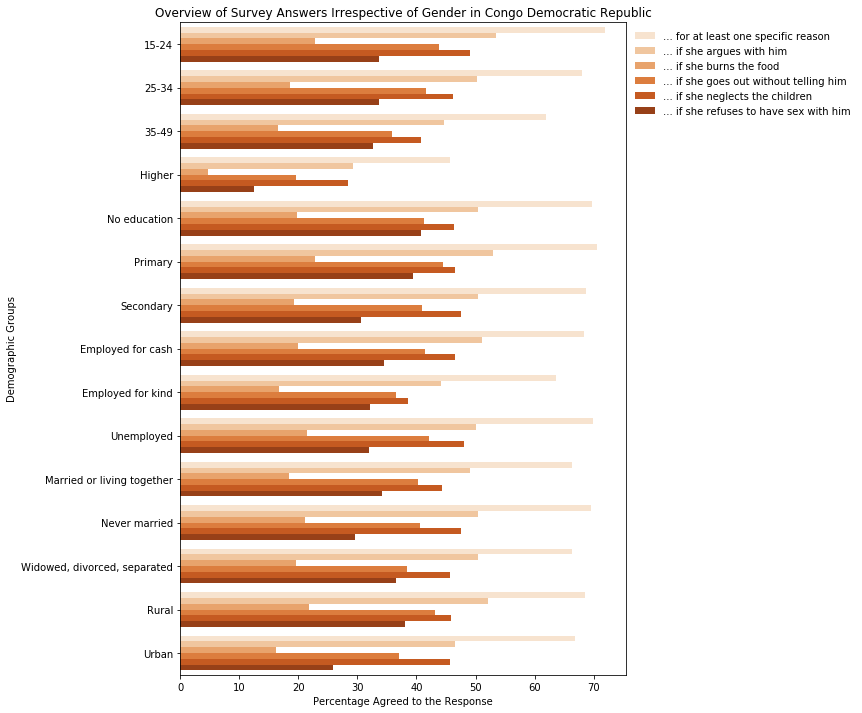

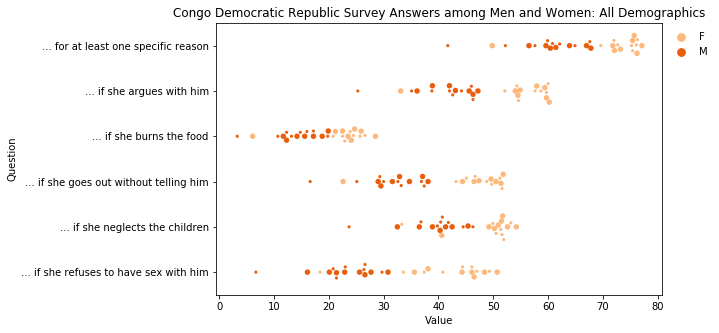

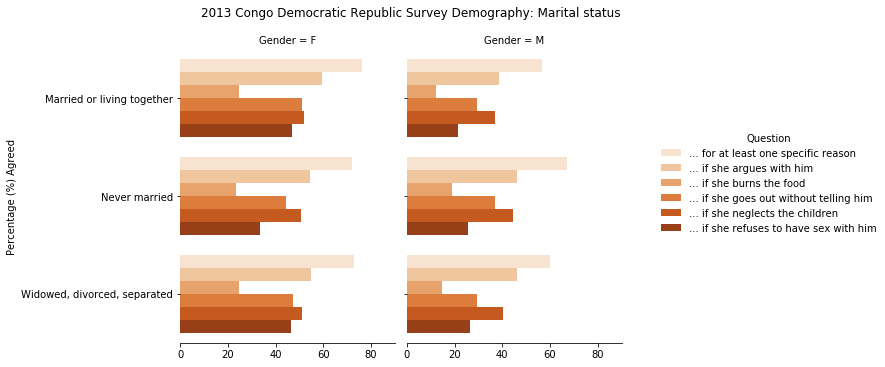

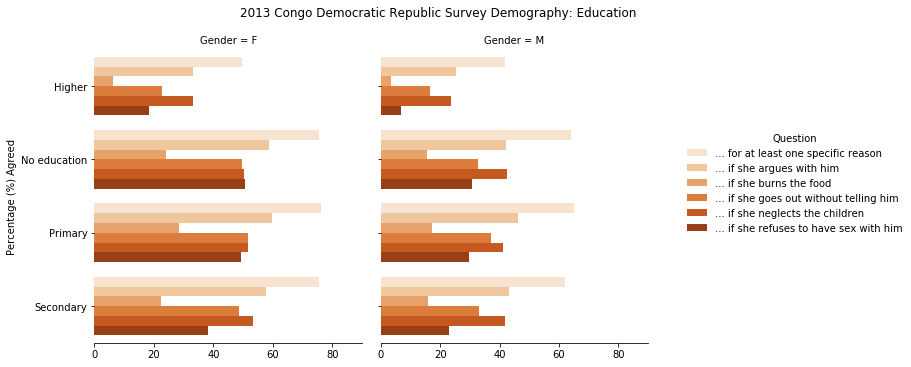

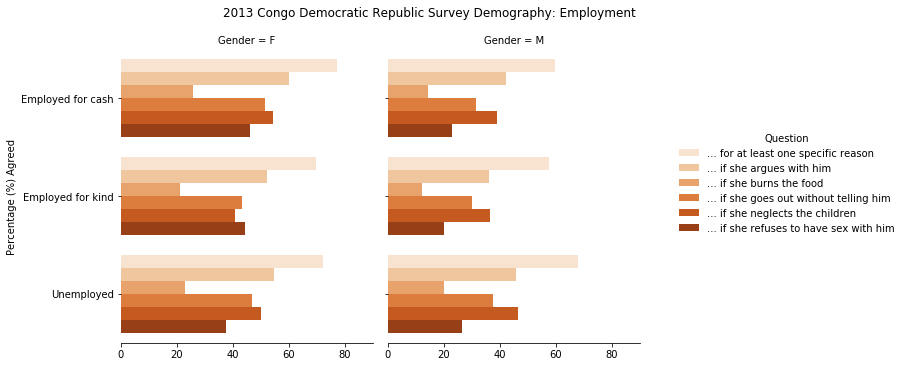

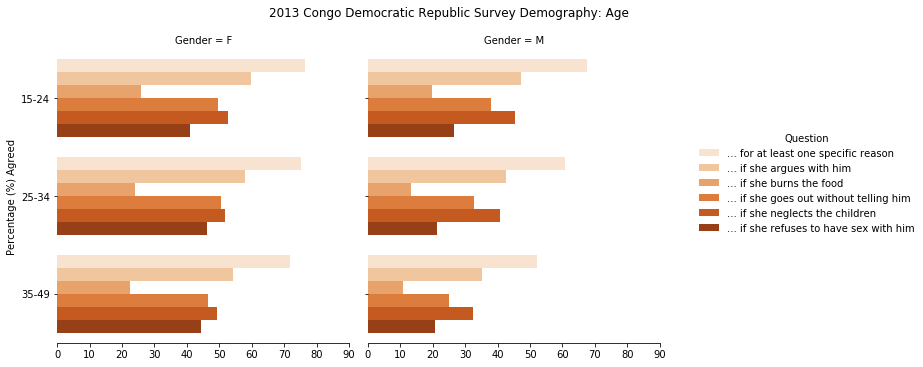

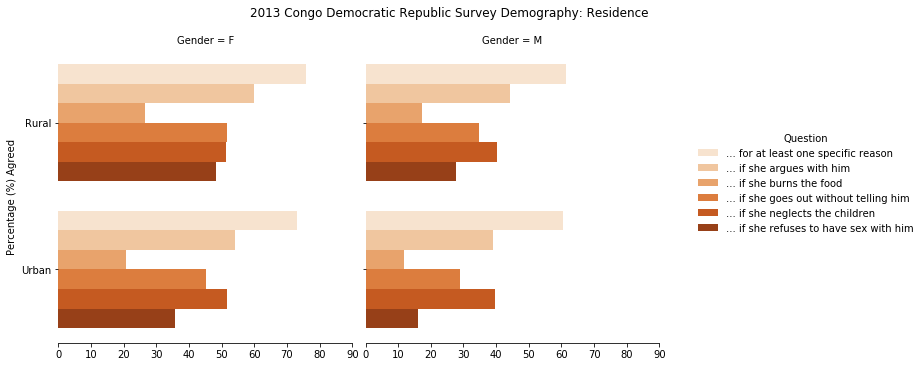

In [21]:
overview_plt("Congo Democratic Republic", CDR)

swarmplot("Congo Democratic Republic", CDR)

catplot(marital_stat_CDR, "2013 Congo Democratic Republic Survey Demography: Marital status")
catplot(education_CDR, "2013 Congo Democratic Republic Survey Demography: Education")
catplot(employment_CDR, "2013 Congo Democratic Republic Survey Demography: Employment")
catplot(age_CDR, "2013 Congo Democratic Republic Survey Demography: Age")
catplot(res_CDR, "2013 Congo Democratic Republic Survey Demography: Residence")

### 2014: Country that caused more VAWG and detailed demographic responses

In [22]:
survey_2014 = df[(df['Survey Year'] == 2014)].groupby(['Country']).aggregate({'Value':np.sum})
survey_2014['Value'].nlargest(1)

Country
Chad    7638.6
Name: Value, dtype: float64

In [23]:
Ch = df[df.Country == "Chad"]
Ch = Ch.groupby(['Demographics Question', 'Demographics Response', 'Gender', 'Question']).agg({'Value': 'sum'}).reset_index()

marital_stat_Ch = Ch[Ch['Demographics Question'] == 'Marital status']
education_Ch = Ch[Ch['Demographics Question'] == 'Education']
employment_Ch = Ch[Ch['Demographics Question'] == 'Employment']
age_Ch = Ch[Ch['Demographics Question'] == 'Age']
res_Ch = Ch[Ch['Demographics Question'] == 'Residence']

In [24]:
def swarmplot(country, df):

    plt.figure(figsize = [8, 5])
    g = sns.swarmplot(x="Value", y="Question",hue="Gender", sizes=(10, 30), data=df, palette = 'rocket')
    plt.title('{} Survey Answers among Men and Women: All Demographics'.format(country))
    plt.legend(frameon = False, bbox_to_anchor=(1, 1))
    plt.show()
    
def catplot(data, titles):
    
    g = sns.catplot(x='Value', y='Demographics Response', col='Gender', hue='Question',
                data=data, kind='bar', ci=None, palette="rocket", margin_titles=True)
    g.fig.suptitle(titles, y=1.05)
    (g.set_axis_labels("", "Percentage (%) Agreed").set_titles("{col_name} {col_var}").set(xlim=(0, 90)).despine(left=True))
    plt.show()
    
def overview_plt(country, df):
    
    plt.figure(figsize = [8, 12])
    g = sns.barplot(x="Value", y = 'Demographics Response', data=df, hue = 'Question',  palette="rocket", ci = None)
    plt.title('Overview of Survey Answers Irrespective of Gender in {}'.format(country))
    plt.xlabel('Percentage Agreed to the Response')
    plt.ylabel('Demographic Groups')
    plt.legend(frameon = False, bbox_to_anchor=(1, 1))
    plt.show()

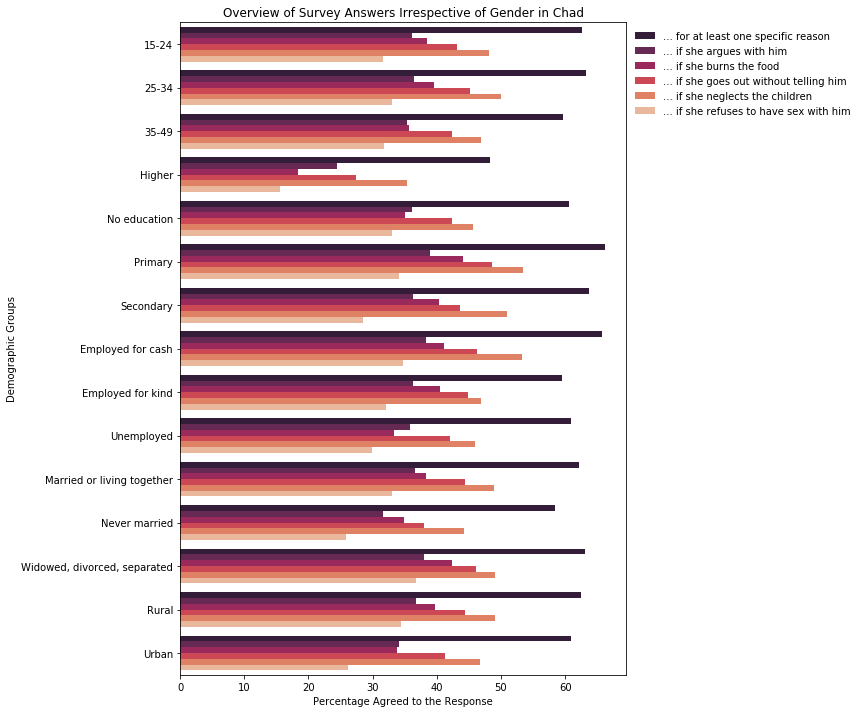

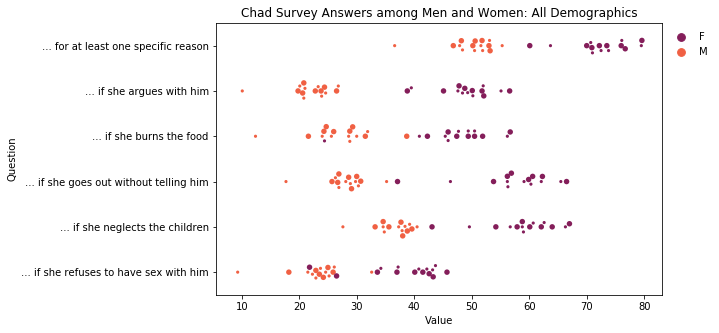

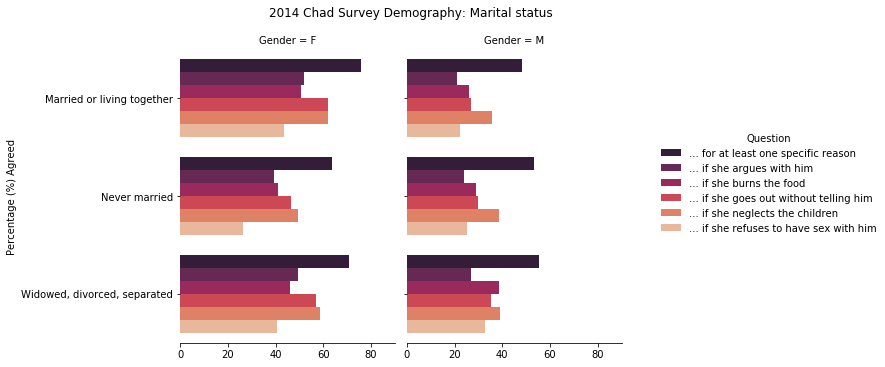

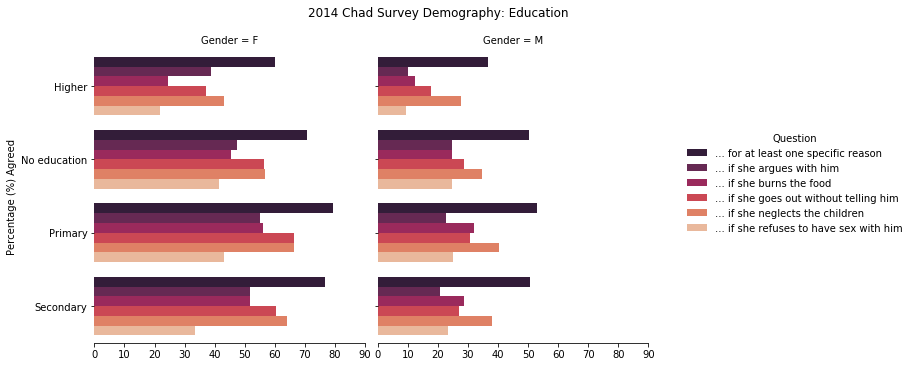

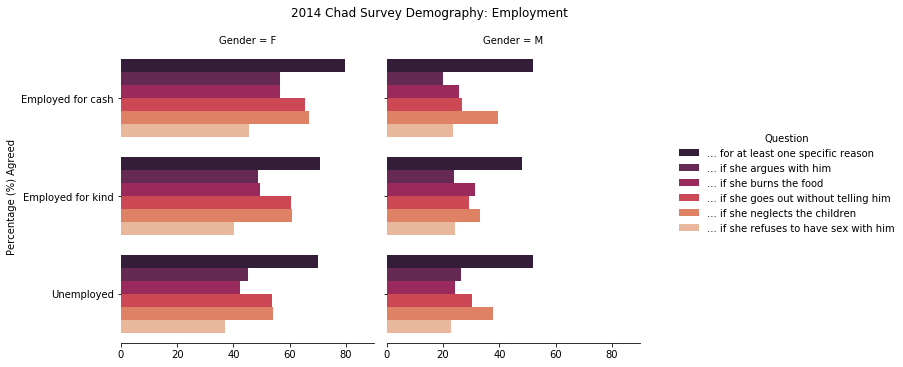

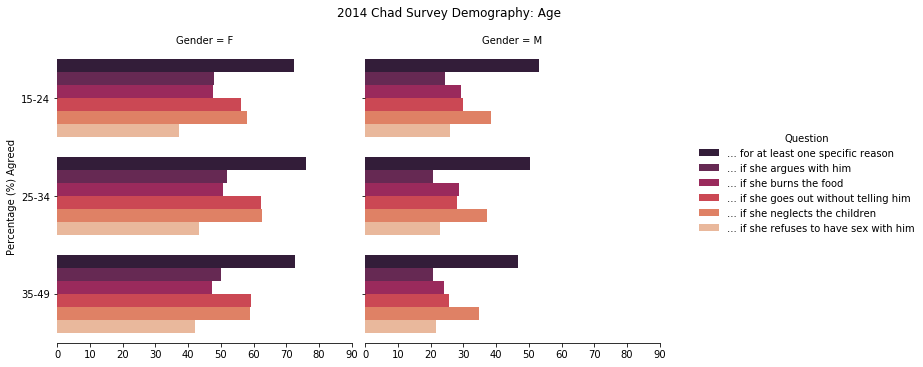

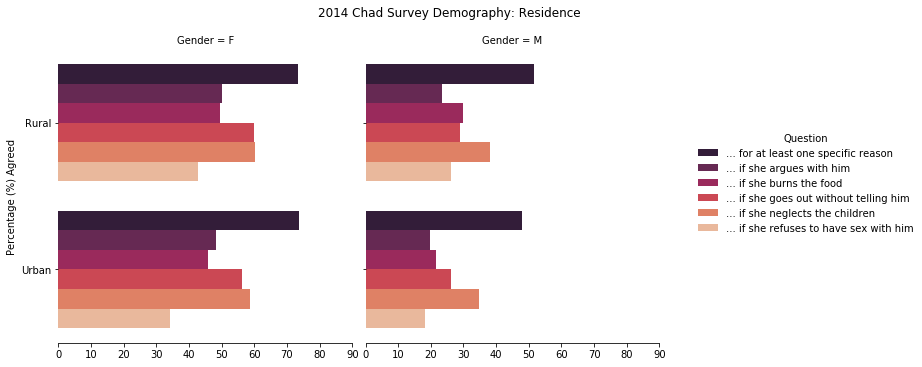

In [25]:
overview_plt("Chad", Ch)

swarmplot("Chad", Ch)

catplot(marital_stat_Ch, "2014 Chad Survey Demography: Marital status")
catplot(education_Ch, "2014 Chad Survey Demography: Education")
catplot(employment_Ch, "2014 Chad Survey Demography: Employment")
catplot(age_Ch, "2014 Chad Survey Demography: Age")
catplot(res_Ch, "2014 Chad Survey Demography: Residence")

### 2015: Country that caused more VAWG and detailed demographic responses

In [26]:
survey_2015 = df[(df['Survey Year'] == 2015)].groupby(['Country']).aggregate({'Value':np.sum})
survey_2015['Value'].nlargest(1)

Country
Afghanistan    7170.8
Name: Value, dtype: float64

In [27]:
Af = df[df.Country == "Afghanistan"]
Af = Af.groupby(['Demographics Question', 'Demographics Response', 'Gender', 'Question']).agg({'Value': 'sum'}).reset_index()

marital_stat_Af = Af[Af['Demographics Question'] == 'Marital status']
education_Af = Af[Af['Demographics Question'] == 'Education']
employment_Af = Af[Af['Demographics Question'] == 'Employment']
age_Af = Af[Af['Demographics Question'] == 'Age']
res_Af = Af[Af['Demographics Question'] == 'Residence']

In [28]:
def swarmplot(country, df):

    plt.figure(figsize = [8, 5])
    g = sns.swarmplot(x="Value", y="Question",hue="Gender", sizes=(10, 30), data=df, palette = 'RdBu')
    plt.title('{} Survey Answers among Men and Women: All Demographics'.format(country))
    plt.legend(frameon = False, bbox_to_anchor=(1, 1))
    plt.show()
    
def catplot(data, titles):
    
    g = sns.catplot(x='Value', y='Demographics Response', col='Gender', hue='Question',
                data=data, kind='bar', ci=None, palette='RdBu', margin_titles=True)
    g.fig.suptitle(titles, y=1.05)
    (g.set_axis_labels("", "Percentage (%) Agreed").set_titles("{col_name} {col_var}").set(xlim=(0, 90)).despine(left=True))
    plt.show()
    
def overview_plt(country, df):
    
    plt.figure(figsize = [8, 12])
    g = sns.barplot(x="Value", y = 'Demographics Response', data=df, hue = 'Question',  palette='RdBu', ci = None)
    plt.title('Overview of Survey Answers Irrespective of Gender in {}'.format(country))
    plt.xlabel('Percentage Agreed to the Response')
    plt.ylabel('Demographic Groups')
    plt.legend(frameon = False, bbox_to_anchor=(1, 1))
    plt.show()

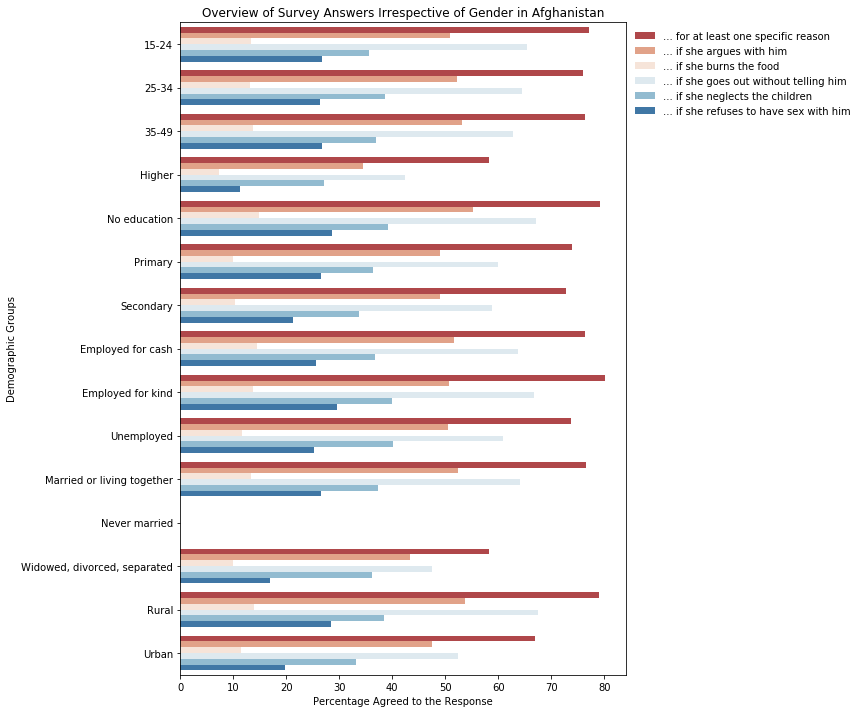

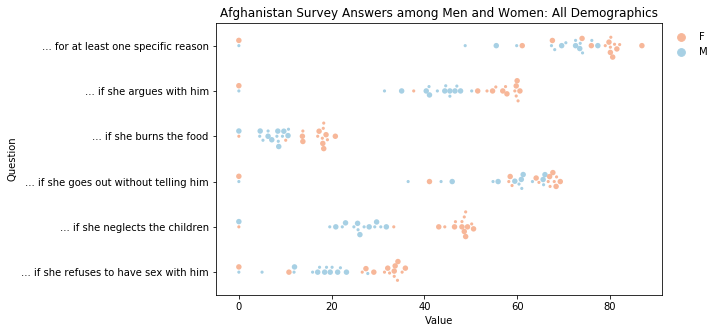

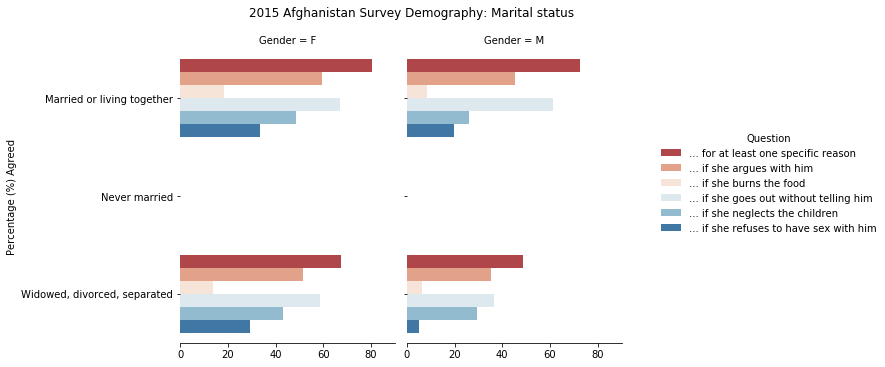

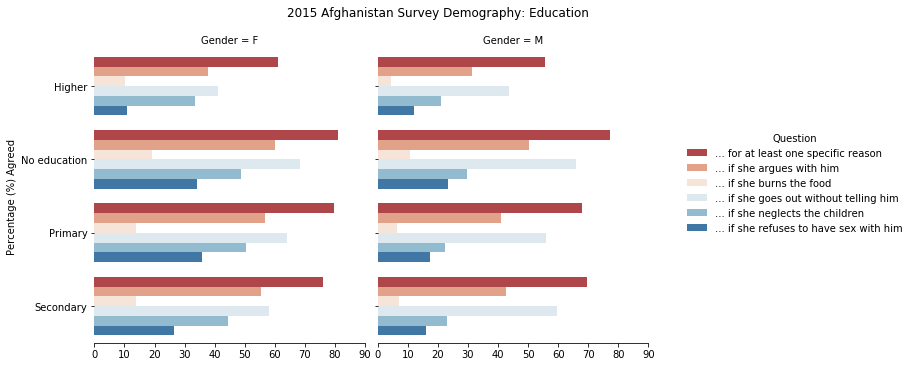

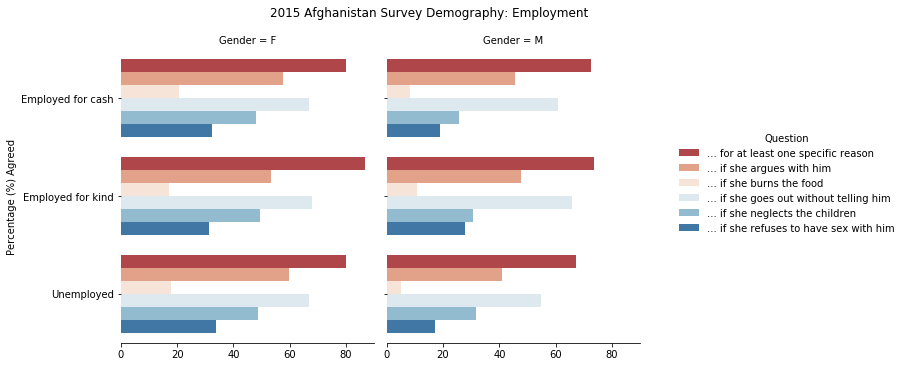

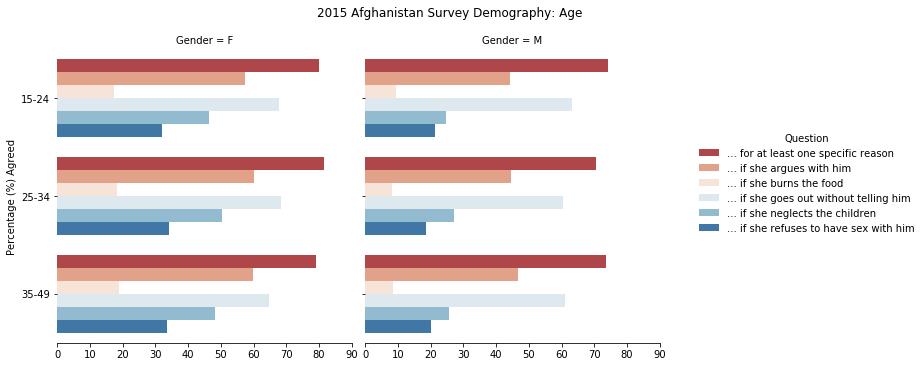

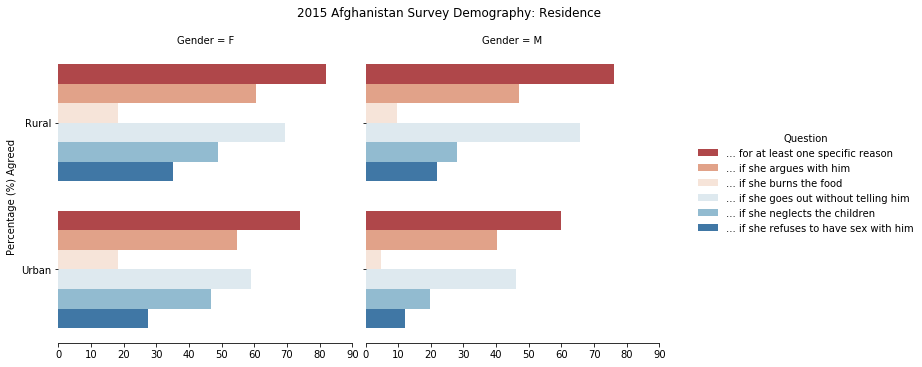

In [29]:
overview_plt("Afghanistan", Af)

swarmplot("Afghanistan", Af)

catplot(marital_stat_Af, "2015 Afghanistan Survey Demography: Marital status")
catplot(education_Af, "2015 Afghanistan Survey Demography: Education")
catplot(employment_Af, "2015 Afghanistan Survey Demography: Employment")
catplot(age_Af, "2015 Afghanistan Survey Demography: Age")
catplot(res_Af, "2015 Afghanistan Survey Demography: Residence")

### 2016: Country that caused more VAWG and detailed demographic responses

In [30]:
survey_2016 = df[(df['Survey Year'] == 2016)].groupby(['Country']).aggregate({'Value':np.sum})
survey_2016['Value'].nlargest(1)

Country
Timor-Leste    8317.8
Name: Value, dtype: float64

In [31]:
TL = df[df.Country == "Timor-Leste"]
TL = TL.groupby(['Demographics Question', 'Demographics Response', 'Gender', 'Question']).agg({'Value': 'sum'}).reset_index()

marital_stat_TL = TL[TL['Demographics Question'] == 'Marital status']
education_TL = TL[TL['Demographics Question'] == 'Education']
employment_TL = TL[TL['Demographics Question'] == 'Employment']
age_TL = TL[TL['Demographics Question'] == 'Age']
res_TL = TL[TL['Demographics Question'] == 'Residence']

In [32]:
def swarmplot(country, df):

    plt.figure(figsize = [8, 5])
    g = sns.swarmplot(x="Value", y="Question",hue="Gender", sizes=(10, 30), data=df, palette = 'Blues')
    plt.title('{} Survey Answers among Men and Women: All Demographics'.format(country))
    plt.legend(frameon = False, bbox_to_anchor=(1, 1))
    plt.show()
    
def catplot(data, titles):
    
    g = sns.catplot(x='Value', y='Demographics Response', col='Gender', hue='Question',
                data=data, kind='bar', ci=None, palette="Blues", margin_titles=True)
    g.fig.suptitle(titles, y=1.05)
    (g.set_axis_labels("", "Percentage (%) Agreed").set_titles("{col_name} {col_var}").set(xlim=(0, 90)).despine(left=True))
    plt.show()
    
def overview_plt(country, df):
    
    plt.figure(figsize = [8, 12])
    g = sns.barplot(x="Value", y = 'Demographics Response', data=df, hue = 'Question',  palette="Blues", ci = None)
    plt.title('Overview of Survey Answers Irrespective of Gender in {}'.format(country))
    plt.xlabel('Percentage Agreed to the Response')
    plt.ylabel('Demographic Groups')
    plt.legend(frameon = False, bbox_to_anchor=(1, 1))
    plt.show()

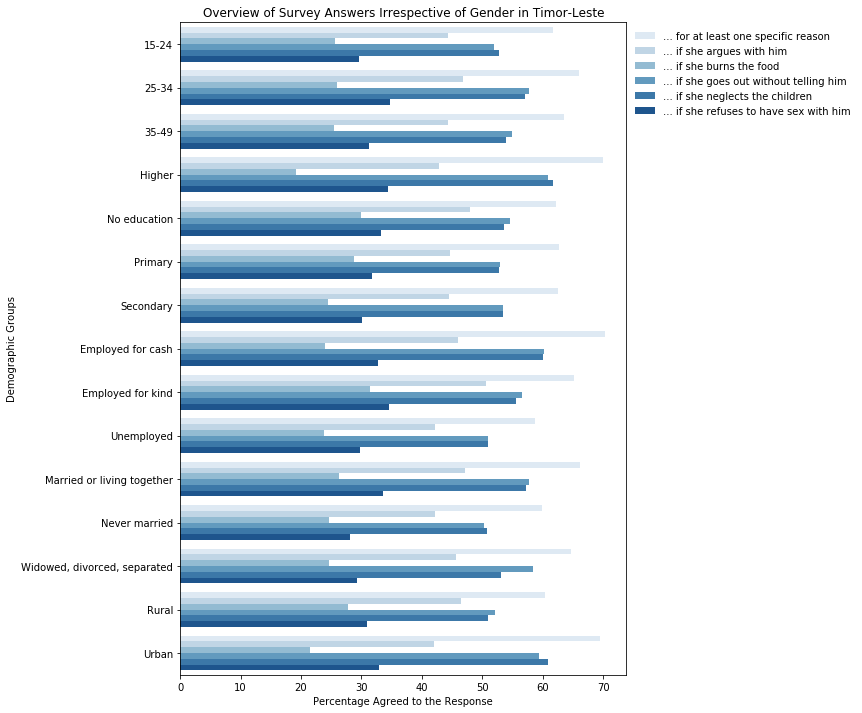

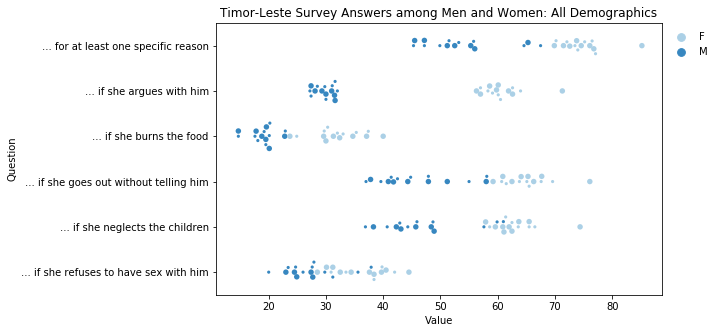

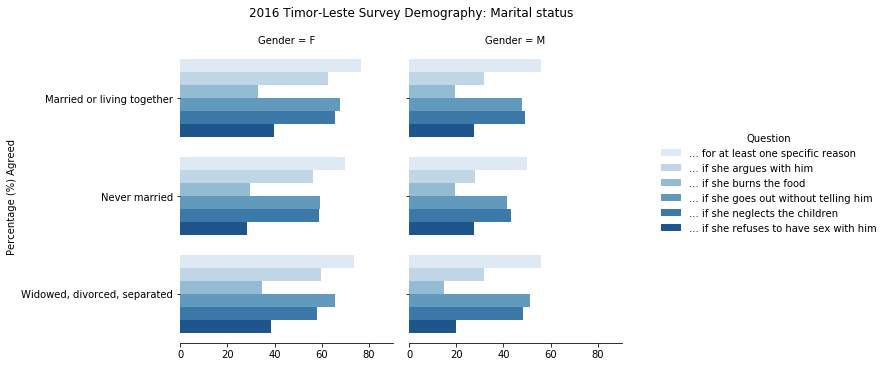

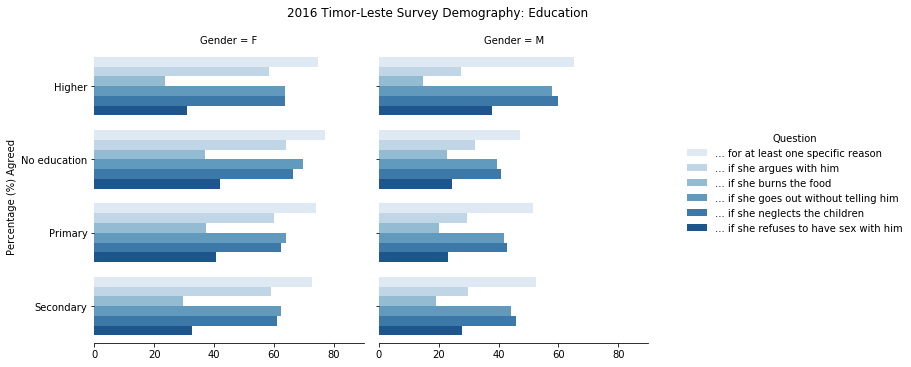

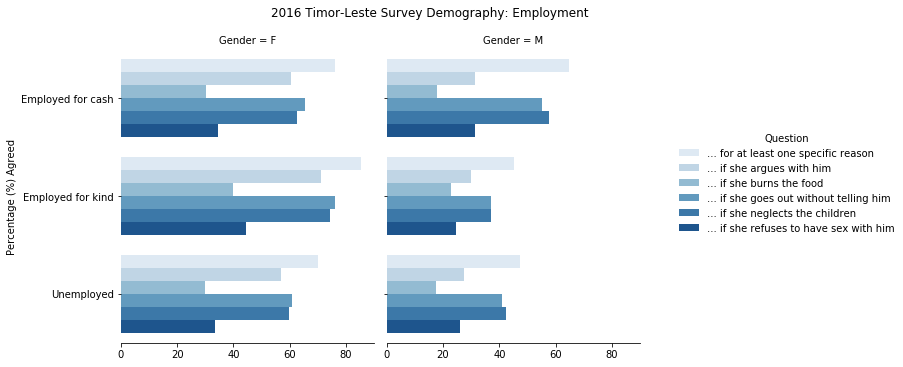

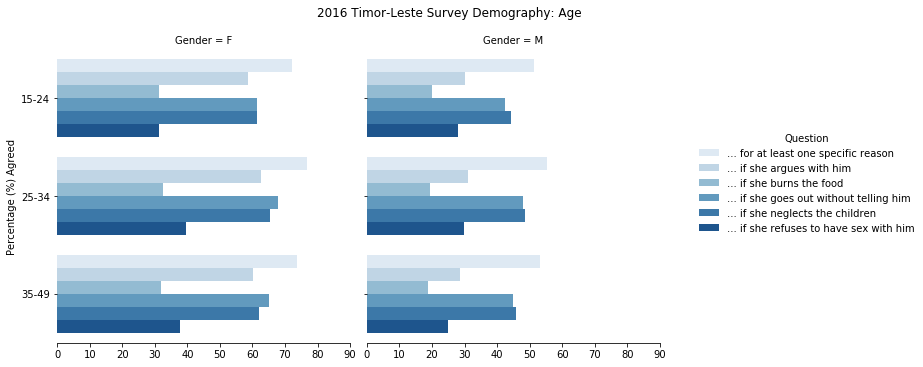

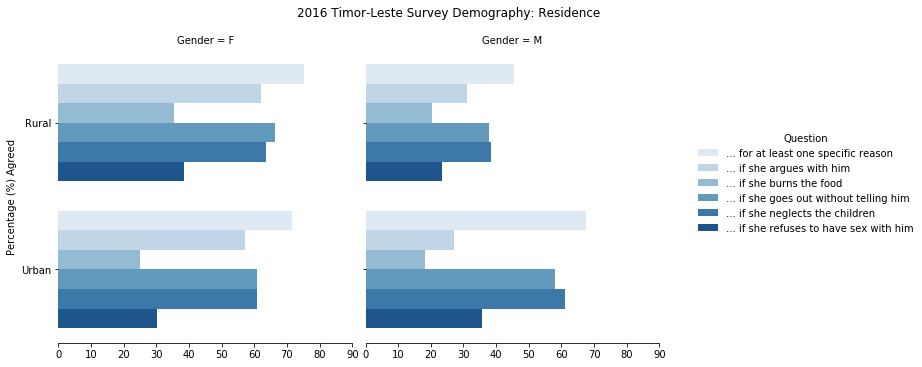

In [33]:
overview_plt("Timor-Leste", TL)

swarmplot("Timor-Leste", TL)

catplot(marital_stat_TL, "2016 Timor-Leste Survey Demography: Marital status")
catplot(education_TL, "2016 Timor-Leste Survey Demography: Education")
catplot(employment_TL, "2016 Timor-Leste Survey Demography: Employment")
catplot(age_TL, "2016 Timor-Leste Survey Demography: Age")
catplot(res_TL, "2016 Timor-Leste Survey Demography: Residence")

### 2017: Country that caused more VAWG and detailed demographic responses

In [34]:
survey_2017 = df[(df['Survey Year'] == 2017)].groupby(['Country']).aggregate({'Value':np.sum})
survey_2017['Value'].nlargest(1)

Country
Senegal    4175.4
Name: Value, dtype: float64

In [35]:
Se = df[df.Country == "Senegal"]
Se = Se.groupby(['Demographics Question', 'Demographics Response', 'Gender', 'Question']).agg({'Value': 'sum'}).reset_index()

marital_stat_Se = Se[Se['Demographics Question'] == 'Marital status']
education_Se = Se[Se['Demographics Question'] == 'Education']
employment_Se = Se[Se['Demographics Question'] == 'Employment']
age_Se = Se[Se['Demographics Question'] == 'Age']
res_Se = Se[Se['Demographics Question'] == 'Residence']

In [36]:
Se = df[df.Country == "Senegal"]
se = Se.groupby(['Demographics Response', 'Gender', 'Question']).agg({'Value': 'sum'})
se = se.reset_index()

In [37]:
def swarmplot(country, df):

    plt.figure(figsize = [8, 5])
    g = sns.swarmplot(x="Value", y="Question",hue="Gender", sizes=(10, 30), data=df, palette = 'Greens')
    plt.title('{} Survey Answers among Men and Women: All Demographics'.format(country))
    plt.legend(frameon = False, bbox_to_anchor=(1, 1))
    plt.show()
    
def catplot(data, titles):
    
    g = sns.catplot(x='Value', y='Demographics Response', col='Gender', hue='Question',
                data=data, kind='bar', ci=None, palette='Greens', margin_titles=True)
    g.fig.suptitle(titles, y=1.05)
    (g.set_axis_labels("", "Percentage (%) Agreed").set_titles("{col_name} {col_var}").set(xlim=(0, 90)).despine(left=True))
    plt.show()
    
def overview_plt(country, df):
    
    plt.figure(figsize = [8, 12])
    g = sns.barplot(x="Value", y = 'Demographics Response', data=df, hue = 'Question',  palette='Greens', ci = None)
    plt.title('Overview of Survey Answers Irrespective of Gender in {}'.format(country))
    plt.xlabel('Percentage Agreed to the Response')
    plt.ylabel('Demographic Groups')
    plt.legend(frameon = False, bbox_to_anchor=(1, 1))
    plt.show()

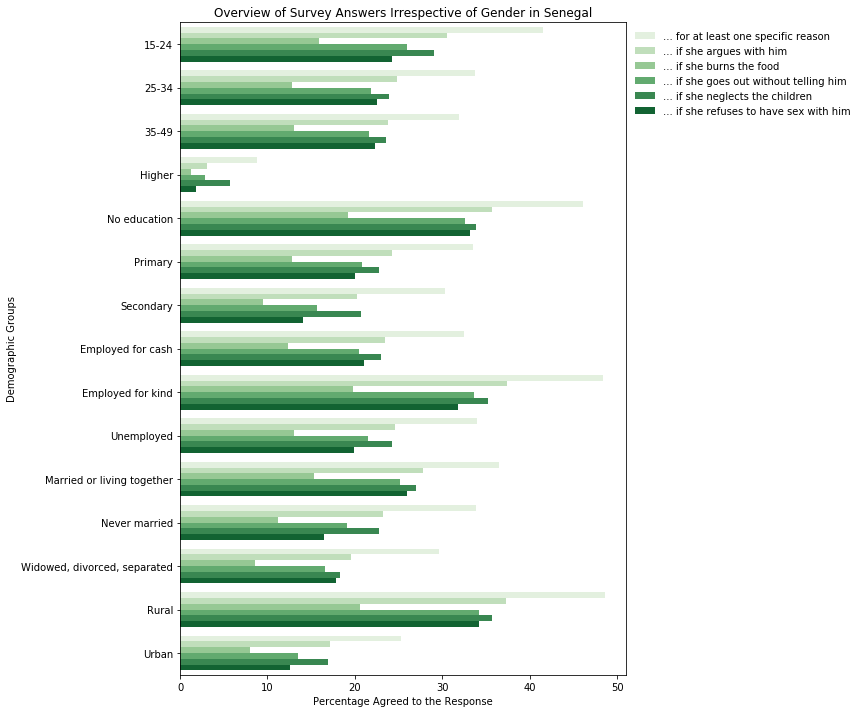

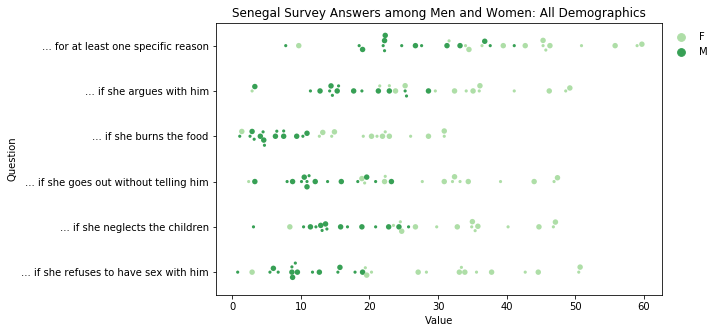

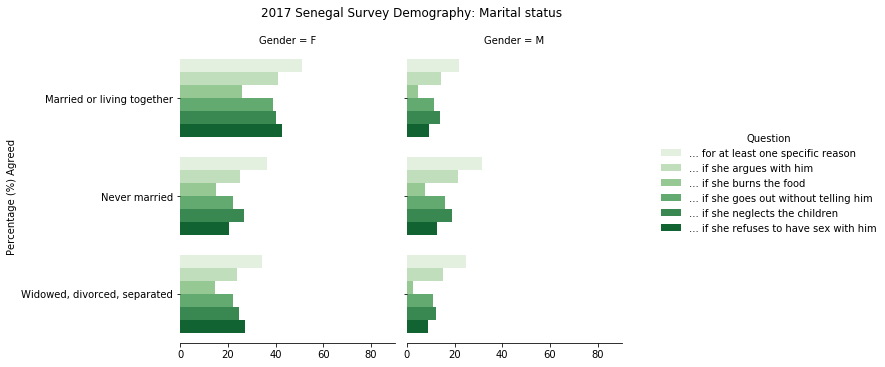

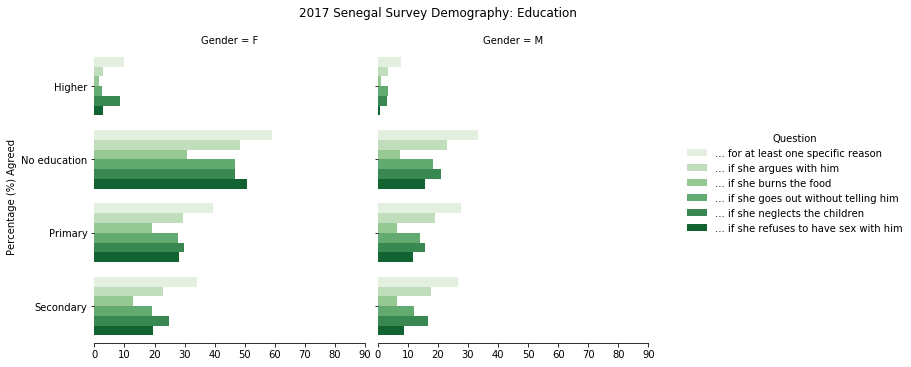

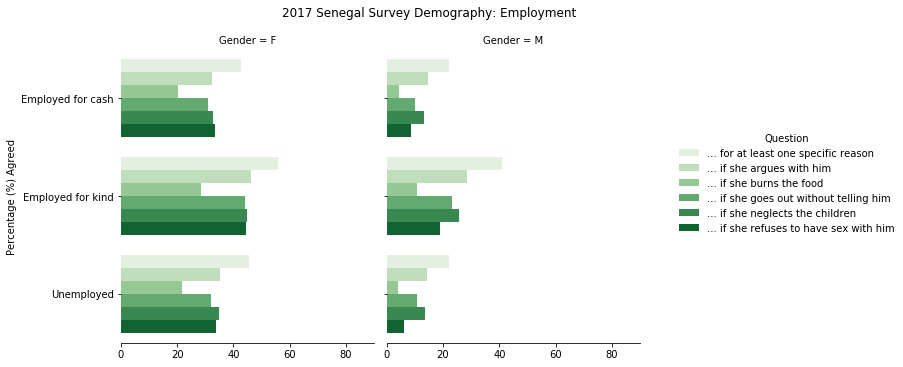

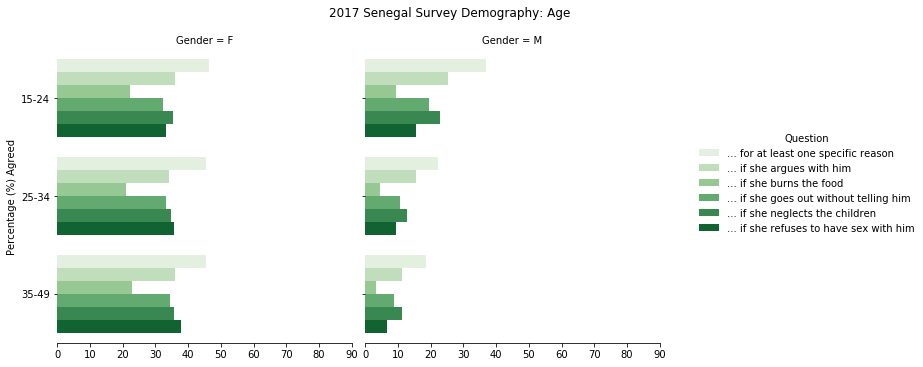

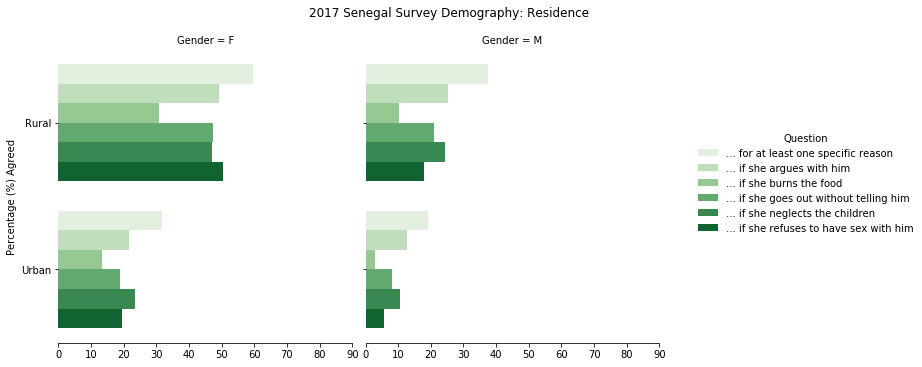

In [38]:
overview_plt("Senegal", Se)

swarmplot("Senegal", Se)

catplot(marital_stat_Se, "2017 Senegal Survey Demography: Marital status")
catplot(education_Se, "2017 Senegal Survey Demography: Education")
catplot(employment_Se, "2017 Senegal Survey Demography: Employment")
catplot(age_Se, "2017 Senegal Survey Demography: Age")
catplot(res_Se, "2017 Senegal Survey Demography: Residence")

### 2018: Country that caused more VAWG and detailed demographic responses

In [39]:
survey_2018 = df[(df['Survey Year'] == 2018)].groupby(['Country']).aggregate({'Value':np.sum})
survey_2018['Value'].nlargest(1)

Country
Guinea    7246.1
Name: Value, dtype: float64

In [40]:
Gn = df[df.Country == "Guinea"]
Gn = Gn.groupby(['Demographics Question', 'Demographics Response', 'Gender', 'Question']).agg({'Value': 'sum'}).reset_index()

marital_stat_Gn = Gn[Gn['Demographics Question'] == 'Marital status']
education_Gn = Gn[Gn['Demographics Question'] == 'Education']
employment_Gn = Gn[Gn['Demographics Question'] == 'Employment']
age_Gn = Gn[Gn['Demographics Question'] == 'Age']
res_Gn = Gn[Gn['Demographics Question'] == 'Residence']

In [41]:
def swarmplot(country, df):

    plt.figure(figsize = [8, 5])
    g = sns.swarmplot(x="Value", y="Question",hue="Gender", sizes=(10, 30), data=df, palette = 'vlag')
    plt.title('{} Survey Answers among Men and Women: All Demographics'.format(country))
    plt.legend(frameon = False, bbox_to_anchor=(1, 1))
    plt.show()
    
def catplot(data, titles):
    
    sns.set_palette("vlag")
    g = sns.catplot(x='Value', y='Demographics Response', col='Gender', hue='Question',
                data=data, kind='bar', ci=None, margin_titles=True)
    g.fig.suptitle(titles, y=1.05)
    (g.set_axis_labels("", "Percentage (%) Agreed").set_titles("{col_name} {col_var}").set(xlim=(0, 80)).despine(left=True))
    plt.show()
    
def overview_plt(country, df):
    
    plt.figure(figsize = [8, 12])
    g = sns.barplot(x="Value", y = 'Demographics Response', data=df, hue = 'Question',  palette="vlag", ci = None)
    plt.title('Overview of Survey Answers Irrespective of Gender in {}'.format(country))
    plt.xlabel('Percentage Agreed to the Response')
    plt.ylabel('Demographic Groups')
    plt.legend(frameon = False, bbox_to_anchor=(1, 1))
    plt.show()

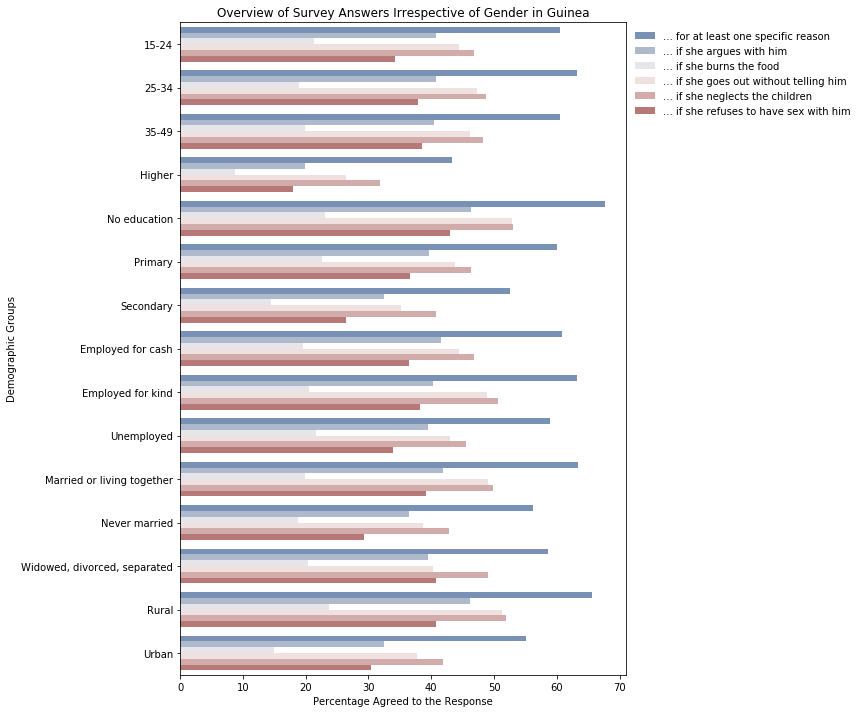

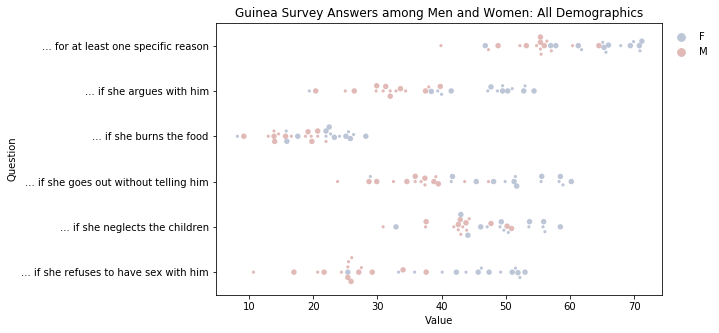

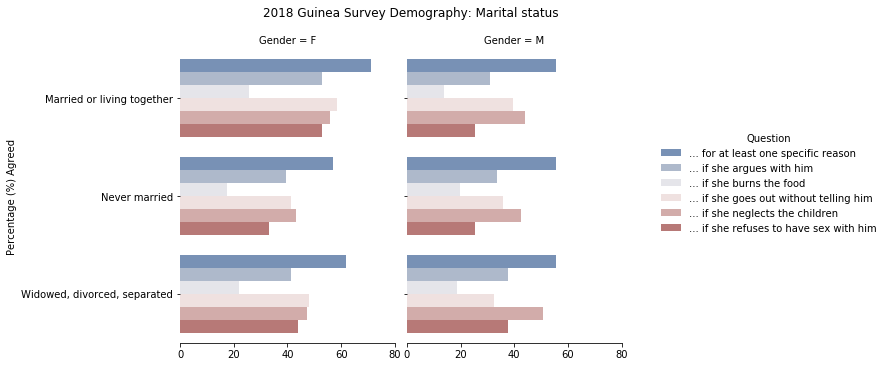

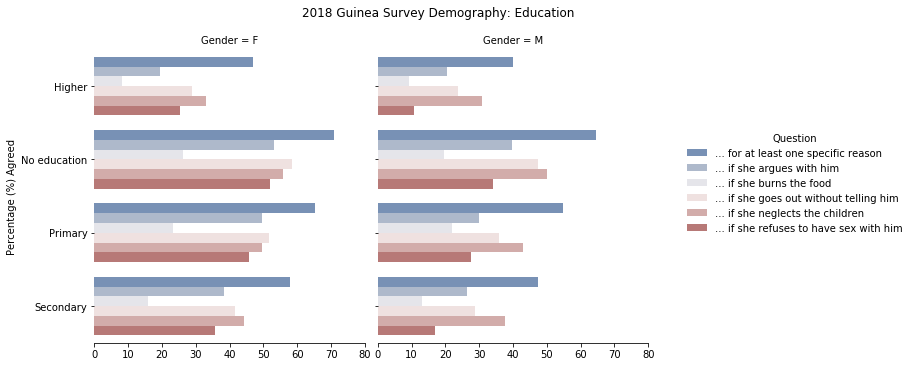

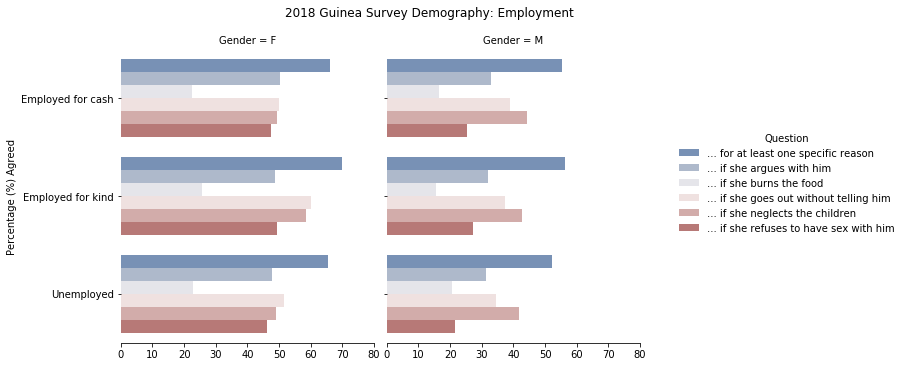

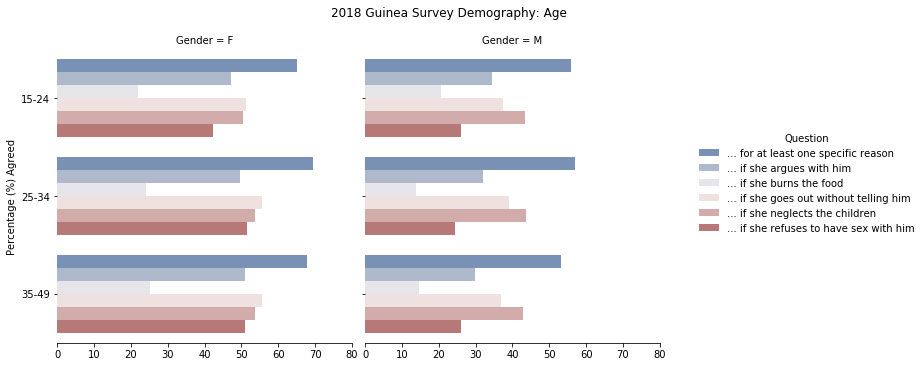

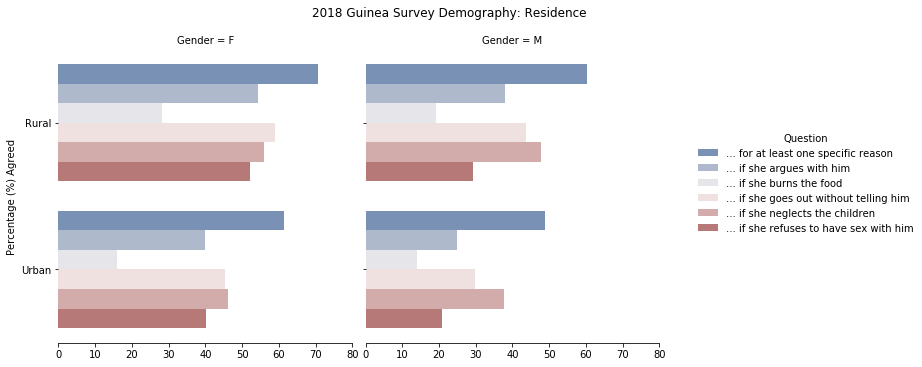

In [42]:
overview_plt("Guinea", Gn)

swarmplot("Guinea", Gn)

catplot(marital_stat_Gn, "2018 Guinea Survey Demography: Marital status")
catplot(education_Gn, "2018 Guinea Survey Demography: Education")
catplot(employment_Gn, "2018 Guinea Survey Demography: Employment")
catplot(age_Gn, "2018 Guinea Survey Demography: Age")
catplot(res_Gn, "2018 Guinea Survey Demography: Residence")

### Bangladesh Data

I am interested to know about how the women and girs are treated in Bangladesh. 

In [43]:
BD = df[(df['Country'] == 'Bangladesh')]
bd = BD.groupby(['Demographics Question', 'Demographics Response', 'Gender', 'Question']).agg({'Value': 'sum'})
bd = bd.reset_index()
bd.head()

,Demographics Question,Demographics Response,Gender,Question,Value
0,Age,15-24,F,... for at least one specific reason,27.9
1,Age,15-24,F,... if she argues with him,19.8
2,Age,15-24,F,... if she burns the food,3.6
3,Age,15-24,F,... if she goes out without telling him,13.9
4,Age,15-24,F,... if she neglects the children,14.6


Text(0.5, 1.05, 'How many answered the survey questions based on various demographic?')

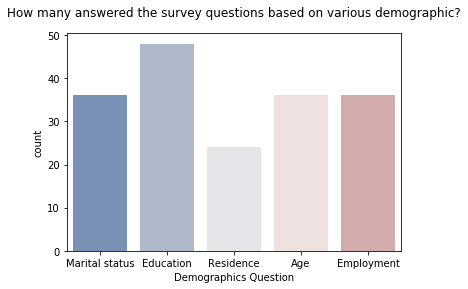

In [44]:
sns.countplot(BD['Demographics Question'])
plt.title('How many answered the survey questions based on various demographic?', y=1.05)

Text(0.5, 1.05, 'Overview of Survey Answers in Various Demographic Circumstances in Bangaldesh')

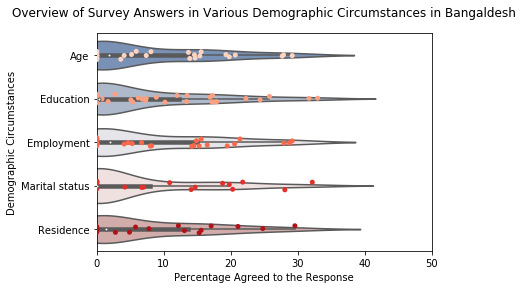

In [45]:
sns.stripplot(bd['Value'], bd['Demographics Question'], edgecolor='black', palette = 'Reds')
sns.violinplot(bd['Value'], bd['Demographics Question']).set(xlim=(0, 50))
plt.xlabel('Percentage Agreed to the Response')
plt.ylabel('Demographic Circumstances')
plt.title('Overview of Survey Answers in Various Demographic Circumstances in Bangaldesh', y=1.05)

<Figure size 576x360 with 0 Axes>

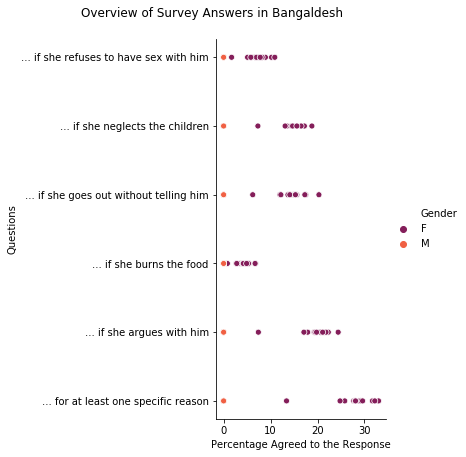

In [46]:
plt.figure(figsize = [8, 5])
g = sns.relplot(x="Value", y="Question", hue="Gender", data=bd, palette = 'rocket', height = 6)
plt.xlabel('Percentage Agreed to the Response')
plt.ylabel('Questions')
g.fig.suptitle('Overview of Survey Answers in Bangaldesh', y=1.05)
plt.show()

<Figure size 1080x864 with 0 Axes>

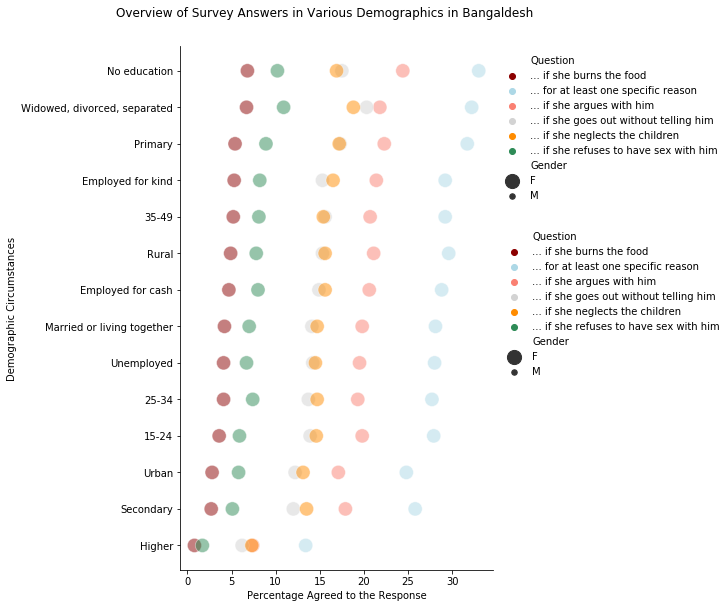

In [47]:
plt.figure(figsize = [15, 12])
g = sns.relplot(x = "Value", y = "Demographics Response", hue = "Question", size = 'Gender', sizes=(30, 200), data=BD, alpha =.5, palette = ['darkred',  'lightblue', 'salmon', 'lightgray', 'darkorange', 'seagreen'], height = 8)
plt.legend(frameon = False, bbox_to_anchor=(1, 1))
plt.xlabel('Percentage Agreed to the Response')
plt.ylabel('Demographic Circumstances')
g.fig.suptitle('Overview of Survey Answers in Various Demographics in Bangaldesh', y=1.05)
plt.show()

**All the male subject disagreed with the questions asked. Therefore, we will consider responses from the female subjects only.**

In [48]:
BD = df[(df['Country'] == 'Bangladesh') & ((df['Gender'] == 'F'))]
bd = BD.groupby(['Demographics Question', 'Demographics Response', 'Gender', 'Question']).agg({'Value': 'sum'}).reset_index()

def catplot(data, titles):
    
    sns.set_palette("vlag")
    g = sns.catplot(x='Value', y='Demographics Response', hue='Question',
                data=data, kind='bar', ci=None, margin_titles=True)
    g.fig.suptitle(titles, y=1.05)
    (g.set_axis_labels("", "Percentage (%) Agreed").set_titles("{col_name} {col_var}").set(xlim=(0, 40)).despine(left=True))
    plt.show()

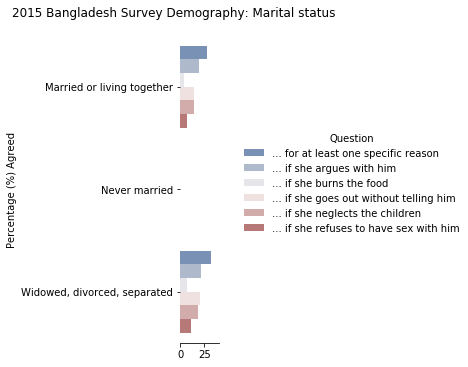

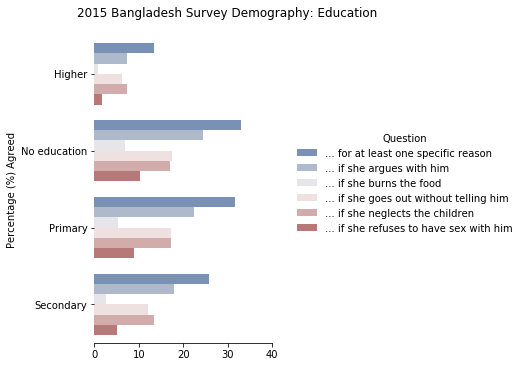

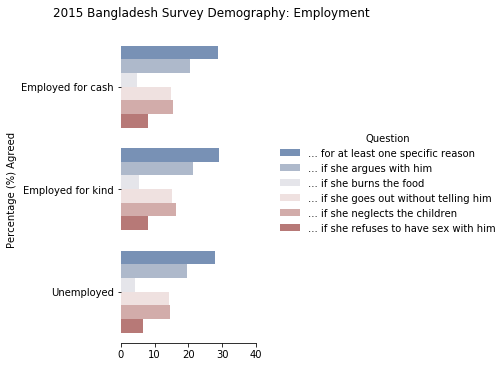

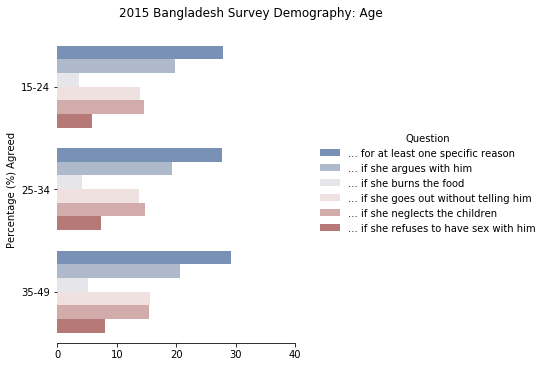

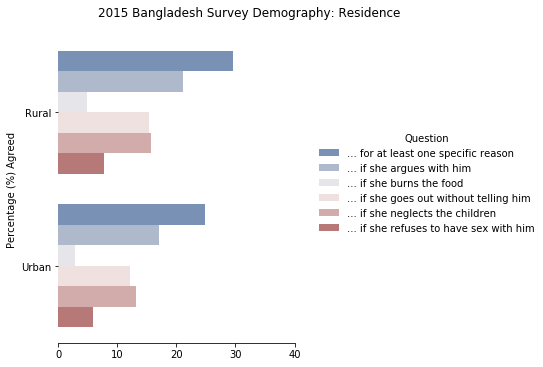

In [49]:
marital_stat_BD = bd[bd['Demographics Question'] == 'Marital status']
education_BD = bd[bd['Demographics Question'] == 'Education']
employment_BD = bd[bd['Demographics Question'] == 'Employment']
age_BD = bd[bd['Demographics Question'] == 'Age']
res_BD = bd[bd['Demographics Question'] == 'Residence']

catplot(marital_stat_BD, "2015 Bangladesh Survey Demography: Marital status")
catplot(education_BD, "2015 Bangladesh Survey Demography: Education")
catplot(employment_BD, "2015 Bangladesh Survey Demography: Employment")
catplot(age_BD, "2015 Bangladesh Survey Demography: Age")
catplot(res_BD, "2015 Bangladesh Survey Demography: Residence")